# Align Exploratory Data Analysis
##### Arjun Arasappan


In [255]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import json
import os
import random

In [256]:
contacts_df = pd.read_csv("Data/contacts_wap_2.csv")
orders_df = pd.read_csv("Data/orders_wap_2.csv")
progreg_df = pd.read_csv("Data/progreg_wap_2.csv")
calls_df = pd.read_csv("Data/calls_wap_2.csv")

# Week 1-3 EDA

## Contacts Data

In [257]:
try:
    contacts_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
except:
    pass
contacts_df.head()

ClinID CertificationDate CountryGroup         State  \
0  0e9bc464c15a91c8ee2e3b477        2016-07-01        U.S.A  South Dakota   
1  c0dfc68693275e37731c35149        2017-06-05        U.S.A    California   
2  4cb3a52529154955043600abf        2018-08-09        U.S.A       Florida   
3  ccc19770f3a2be9b486caa077        2017-06-06        U.S.A      Virginia   
4  62dfffa31393ac3f70a898e28        2017-06-28       Canada            ON   

  InvTerritoryL4 ProfessionalCategory  
0       AM-US-NW                Ortho  
1       AM-US-WE                Ortho  
2       AM-US-SE                Ortho  
3       AM-US-MA                Ortho  
4       AM-CA-CA                Ortho

In [258]:
contacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5233 entries, 0 to 5232
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ClinID                5233 non-null   object
 1   CertificationDate     4987 non-null   object
 2   CountryGroup          5233 non-null   object
 3   State                 5213 non-null   object
 4   InvTerritoryL4        5233 non-null   object
 5   ProfessionalCategory  5233 non-null   object
dtypes: object(6)
memory usage: 245.4+ KB


In [259]:
contacts_df.describe()

ClinID CertificationDate CountryGroup       State  \
count                        5233              4987         5233        5213   
unique                       5233              1958            3          63   
top     0e9bc464c15a91c8ee2e3b477        2001-01-19        U.S.A  California   
freq                            1               306         4894         782   

       InvTerritoryL4 ProfessionalCategory  
count            5233                 5233  
unique             12                    2  
top          AM-US-NE                Ortho  
freq              904                 5223

In [260]:
contacts_df['CountryGroup'] = contacts_df['CountryGroup'].astype('category')
contacts_df['State'] = contacts_df['State'].astype('category')
contacts_df["InvTerritoryL4"] = contacts_df["InvTerritoryL4"].astype('category')
contacts_df['ProfessionalCategory'] = contacts_df['ProfessionalCategory'].astype('category')

In [261]:
contacts_df.isnull().sum()

ClinID                    0
CertificationDate       246
CountryGroup              0
State                    20
InvTerritoryL4            0
ProfessionalCategory      0
dtype: int64

In [262]:
contacts_df = contacts_df.dropna()
contacts_df.reset_index(drop=True, inplace=True)
contacts_df

ClinID CertificationDate CountryGroup  \
0     0e9bc464c15a91c8ee2e3b477        2016-07-01        U.S.A   
1     c0dfc68693275e37731c35149        2017-06-05        U.S.A   
2     4cb3a52529154955043600abf        2018-08-09        U.S.A   
3     ccc19770f3a2be9b486caa077        2017-06-06        U.S.A   
4     62dfffa31393ac3f70a898e28        2017-06-28       Canada   
...                         ...               ...          ...   
4965  50053fb4bccc6863d497d575a        2021-01-14        U.S.A   
4966  c1b270b9a5f25752b9585be62        2020-07-31        U.S.A   
4967  ae482d9a241d0ede1e121f39b        2021-12-09       Canada   
4968  dddb5161cd5ff437f8a1e32af        2021-04-26        U.S.A   
4969  abcba7d1d24c7bc28d64d0f4f        2022-02-11        U.S.A   

               State InvTerritoryL4 ProfessionalCategory  
0       South Dakota       AM-US-NW                Ortho  
1         California       AM-US-WE                Ortho  
2            Florida       AM-US-SE                Ortho  
3           Virginia       AM-US-MA                Ortho  
4                 ON       AM-CA-CA                Ortho  
...              ...            ...                  ...  
4965        Michigan       AM-US-MW                Ortho  
4966      California       AM-US-WE                Ortho  
4967              ON       AM-CA-CA                Ortho  
4968         Georgia       AM-US-SE                Ortho  
4969  South Carolina       AM-US-SE                Ortho  

[4970 rows x 6 columns]

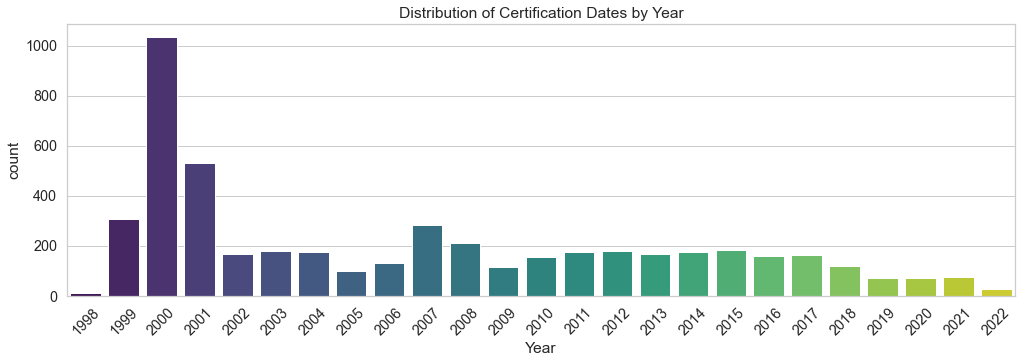

In [263]:
contacts_df['Year'] = pd.to_datetime(contacts_df['CertificationDate']).dt.year
contacts_df['Month'] = pd.to_datetime(contacts_df['CertificationDate']).dt.month

sns.set_style("whitegrid")
plt.figure(figsize=(17, 5))
sns.countplot(data=contacts_df, x='Year', palette='viridis')
plt.title('Distribution of Certification Dates by Year')
plt.xticks(rotation=45)
plt.show()

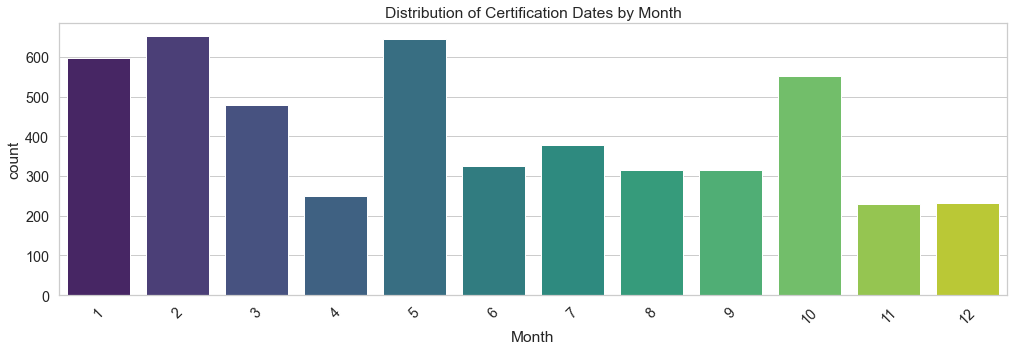

In [264]:
sns.set_style("whitegrid")
plt.figure(figsize=(17, 5))
sns.countplot(data=contacts_df, x='Month', palette='viridis')
plt.title('Distribution of Certification Dates by Month')
plt.xticks(rotation=45)
plt.show()

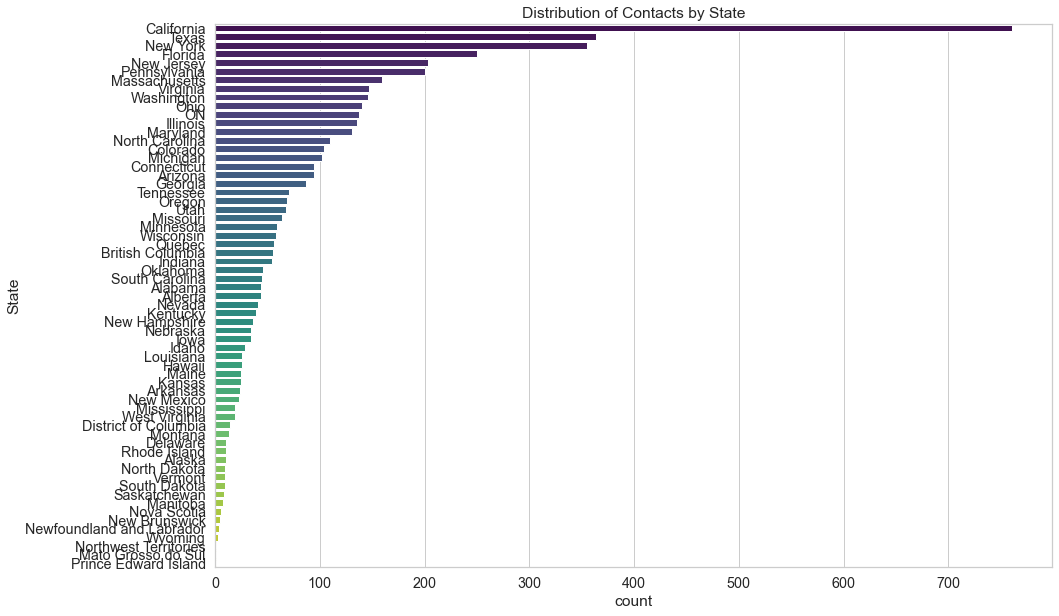

In [265]:
plt.figure(figsize=(15, 10))
sns.countplot(data=contacts_df, y='State', order=contacts_df['State'].value_counts().index, palette='viridis')
plt.title('Distribution of Contacts by State')
plt.show()

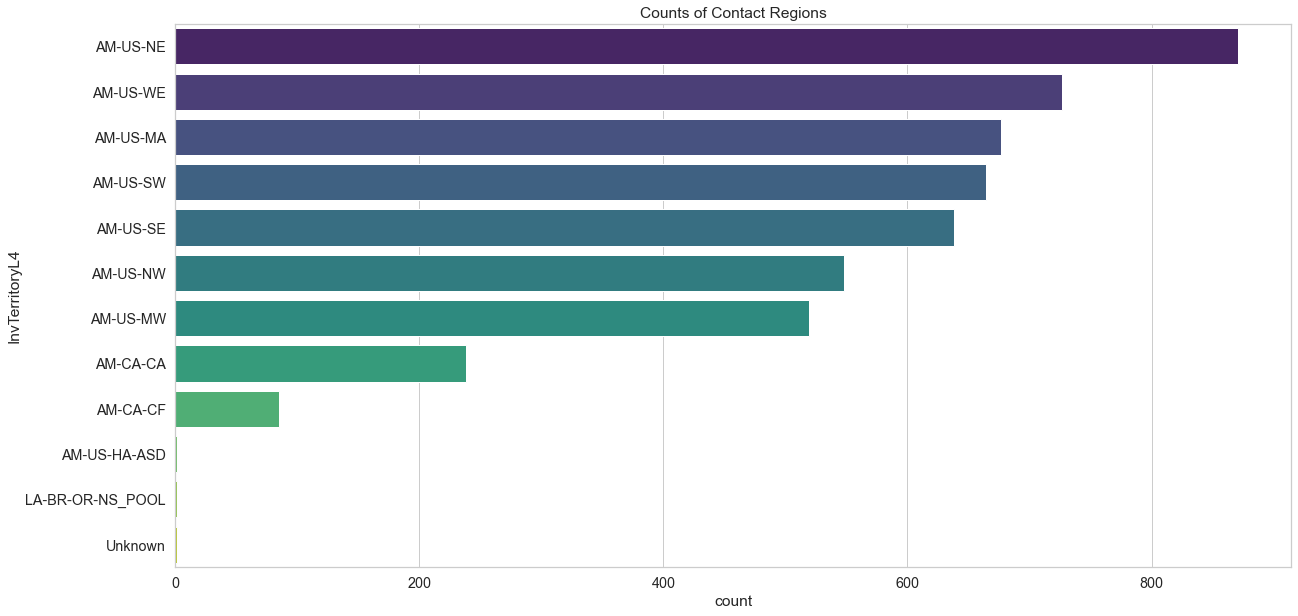

In [266]:
plt.figure(figsize=(20, 10))
sns.countplot(data=contacts_df, y='InvTerritoryL4', order=contacts_df['InvTerritoryL4'].value_counts().index, palette='viridis')
plt.title('Counts of Contact Regions')
plt.show()

## Orders Data

In [267]:
try:
    orders_df.drop(['Unnamed: 0'], axis = 1, inplace = True, )
except:
    pass
orders_df.head()


ClinID MonthStartDate  CCAs  CCAsTeen  CCAsiTero  \
0  393d4620c44ed3cefc0a2b1a4     2019-01-01    11         4         11   
1  5f9d690664cc6b663a7c9ba0e     2019-01-01     2         0          0   
2  a8701201ab3335be42e1f6989     2019-01-01     2         0          2   
3  7a8a99460e7d43e120d2be76e     2019-01-01     6         2          6   
4  53fe08a99c3c2f81570bf67b8     2019-01-01     7         3          7   

   CCAsComplex  
0            4  
1            0  
2            0  
3            1  
4            4

In [268]:
orders_df['ClinID'].describe()

count                        195587
unique                         5117
top       257f17646d117f0bfb6dd8d00
freq                             51
Name: ClinID, dtype: object

In [269]:
orders_df.isnull().sum()

ClinID            0
MonthStartDate    0
CCAs              0
CCAsTeen          0
CCAsiTero         0
CCAsComplex       0
dtype: int64

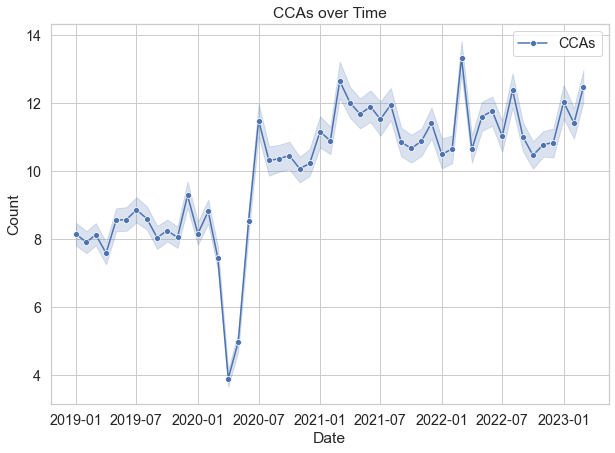

In [270]:
orders_df['MonthStartDate'] = pd.to_datetime(orders_df['MonthStartDate'])
orders_df['MonthStart'] = pd.to_datetime(orders_df['MonthStartDate']).dt.month
orders_df['YearStart'] = pd.to_datetime(orders_df['MonthStartDate']).dt.year

sns.set_style("whitegrid")
plt.figure(figsize=(10, 7))
sns.lineplot(data=orders_df, x='MonthStartDate', y='CCAs', label='CCAs', marker='o')
plt.title('CCAs over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

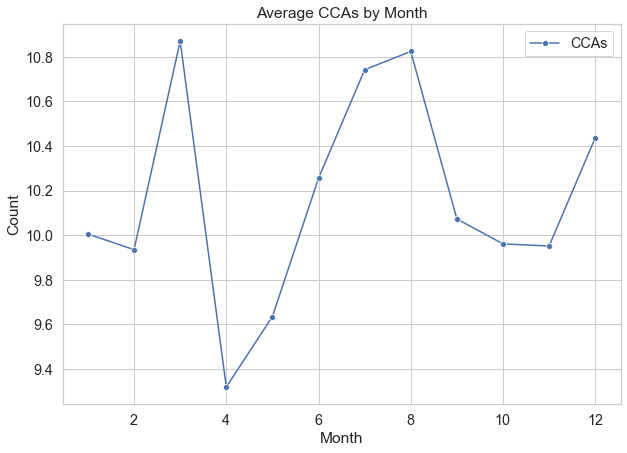

In [271]:
temp_df = orders_df.groupby('MonthStart').agg({'CCAs' : 'mean'})
sns.set_style("whitegrid")
plt.figure(figsize=(10, 7))
sns.lineplot(data=temp_df, x='MonthStart', y='CCAs', label='CCAs', marker='o')
plt.title('Average CCAs by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()

In [272]:
time_series_orders_df = orders_df.set_index('MonthStartDate').sort_index()
time_series_orders_df

ClinID  CCAs  CCAsTeen  CCAsiTero  \
MonthStartDate                                                         
2019-01-01      393d4620c44ed3cefc0a2b1a4    11         4         11   
2019-01-01      42181aa84c9c14a008decdd2a     1         1          1   
2019-01-01      4562376080880f1a8ae0a3348     1         1          1   
2019-01-01      9d6224b724b062997f2db6828    47        21         45   
2019-01-01      ce99e745b9c7f7a6db8cd46ea     1         0          0   
...                                   ...   ...       ...        ...   
2023-03-01      e9e2791e6661c5be94633715d     1         0          1   
2023-03-01      5907b2003c459bf5331fd1a1b     3         1          3   
2023-03-01      66690349e76f260309f0b2035     3         0          3   
2023-03-01      4f45c3dd54b5c32db02b11d5b    13         8         13   
2023-03-01      681989626703789d552a4a3ed    31        16         31   

                CCAsComplex  MonthStart  YearStart  
MonthStartDate                                      
2019-01-01                4           1       2019  
2019-01-01                0           1       2019  
2019-01-01                1           1       2019  
2019-01-01                4           1       2019  
2019-01-01                0           1       2019  
...                     ...         ...        ...  
2023-03-01                0           3       2023  
2023-03-01                0           3       2023  
2023-03-01                0           3       2023  
2023-03-01                3           3       2023  
2023-03-01                7           3       2023  

[195587 rows x 7 columns]

Text(0, 0.5, 'Count')

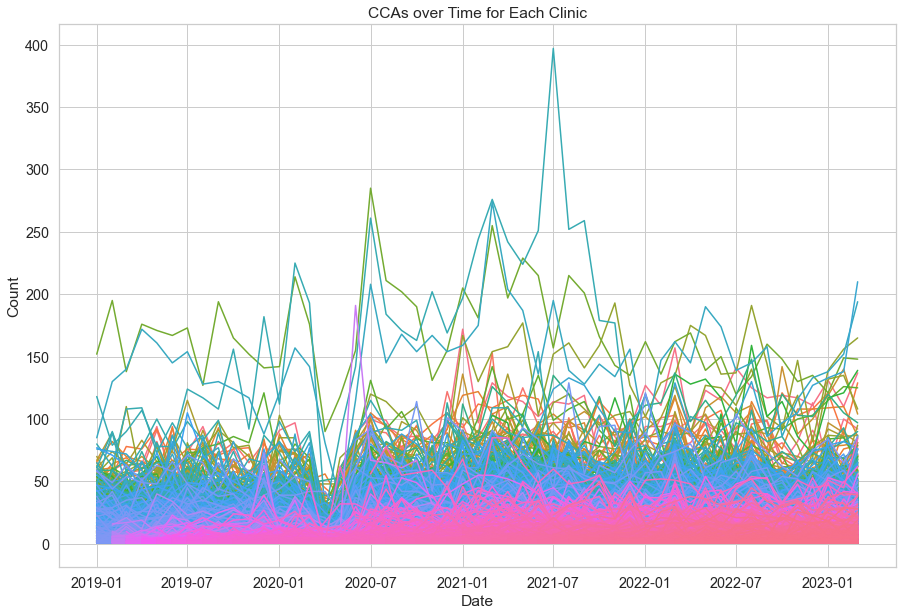

In [273]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.lineplot(data=time_series_orders_df, x=time_series_orders_df.index, y='CCAs', hue='ClinID', legend=None)
plt.title('CCAs over Time for Each Clinic')
plt.xlabel('Date')
plt.ylabel('Count')

/var/folders/wc/q1ymn9sj19v03d48ys7nf4dw0000gn/T/ipykernel_67698/446869436.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summed_orders = time_series_orders_df.groupby(time_series_orders_df.index).mean()


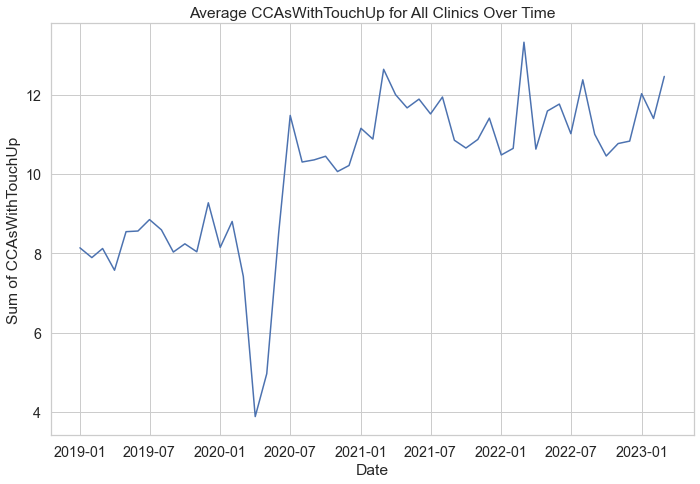

In [274]:
plt.figure(figsize=(10, 7))
summed_orders = time_series_orders_df.groupby(time_series_orders_df.index).mean()
sns.lineplot(data=summed_orders, x=summed_orders.index, y='CCAs')
plt.title('Average CCAsWithTouchUp for All Clinics Over Time')
plt.xlabel('Date')
plt.ylabel('Sum of CCAsWithTouchUp')

plt.tight_layout()
plt.show()

In [275]:
time_series_orders_df

ClinID  CCAs  CCAsTeen  CCAsiTero  \
MonthStartDate                                                         
2019-01-01      393d4620c44ed3cefc0a2b1a4    11         4         11   
2019-01-01      42181aa84c9c14a008decdd2a     1         1          1   
2019-01-01      4562376080880f1a8ae0a3348     1         1          1   
2019-01-01      9d6224b724b062997f2db6828    47        21         45   
2019-01-01      ce99e745b9c7f7a6db8cd46ea     1         0          0   
...                                   ...   ...       ...        ...   
2023-03-01      e9e2791e6661c5be94633715d     1         0          1   
2023-03-01      5907b2003c459bf5331fd1a1b     3         1          3   
2023-03-01      66690349e76f260309f0b2035     3         0          3   
2023-03-01      4f45c3dd54b5c32db02b11d5b    13         8         13   
2023-03-01      681989626703789d552a4a3ed    31        16         31   

                CCAsComplex  MonthStart  YearStart  
MonthStartDate                                      
2019-01-01                4           1       2019  
2019-01-01                0           1       2019  
2019-01-01                1           1       2019  
2019-01-01                4           1       2019  
2019-01-01                0           1       2019  
...                     ...         ...        ...  
2023-03-01                0           3       2023  
2023-03-01                0           3       2023  
2023-03-01                0           3       2023  
2023-03-01                3           3       2023  
2023-03-01                7           3       2023  

[195587 rows x 7 columns]

In [276]:
average_CCAsWithTouchUp = time_series_orders_df.groupby('ClinID')['CCAs'].mean()
first_order_time = time_series_orders_df.groupby('ClinID').apply(lambda x: x.index.min())
last_order_time = time_series_orders_df.groupby('ClinID').apply(lambda x: x.index.max())

duration_of_orders = time_series_orders_df.groupby('ClinID').apply(lambda x: (x.index.max() - x.index.min()).days)
number_of_times_ordered = time_series_orders_df.groupby('ClinID')['CCAs'].count()

clinic_order_metrics_df = pd.DataFrame({
    'ClinID': average_CCAsWithTouchUp.index,
    'Average_CCAsWithTouchUp': average_CCAsWithTouchUp.values,
    'Days_Between_First_and_Last_Order': duration_of_orders.values,
    'Number_Of_Times_Ordered': number_of_times_ordered,
    'Time_First_Order': first_order_time,
    'Time_Last_Order': last_order_time,
})

clinic_order_metrics_df['Is_Ordering'] = clinic_order_metrics_df['Time_Last_Order'] == '2022-12-01'


clinic_order_metrics_df.reset_index(drop=True, inplace=True)
clinic_order_metrics_df

ClinID  Average_CCAsWithTouchUp  \
0     004982089bd1ecf431bcc70ae                 1.296296   
1     0052ca6f645bd8afb2d184037                10.160000   
2     005555daab005c69eefb0f0a8                10.000000   
3     006d5212f8eca7116b3759e5b                15.882353   
4     007e33d579d4534505f23dde0                 1.000000   
...                         ...                      ...   
5112  ffa4c13cfbc4940f8cdf0dcc5                 5.693878   
5113  ffb9502764156cf9960bfc17a                11.725490   
5114  ffcce140156215ca5b425d450                 6.234043   
5115  ffd18c648803ff7d87fda8f48                10.489796   
5116  fff41e806b27c9674dde79ca1                 6.720000   

      Days_Between_First_and_Last_Order  Number_Of_Times_Ordered  \
0                                  1520                       27   
1                                  1520                       50   
2                                  1520                       50   
3                                  1520                       51   
4                                     0                        1   
...                                 ...                      ...   
5112                               1520                       49   
5113                               1520                       51   
5114                               1520                       47   
5115                               1520                       49   
5116                               1520                       50   

     Time_First_Order Time_Last_Order  Is_Ordering  
0          2019-01-01      2023-03-01        False  
1          2019-01-01      2023-03-01        False  
2          2019-01-01      2023-03-01        False  
3          2019-01-01      2023-03-01        False  
4          2021-07-01      2021-07-01        False  
...               ...             ...          ...  
5112       2019-01-01      2023-03-01        False  
5113       2019-01-01      2023-03-01        False  
5114       2019-01-01      2023-03-01        False  
5115       2019-01-01      2023-03-01        False  
5116       2019-01-01      2023-03-01        False  

[5117 rows x 7 columns]

In [277]:
for c in clinic_order_metrics_df.columns:
    print(clinic_order_metrics_df[c].describe(), '\n')

count                          5117
unique                         5117
top       004982089bd1ecf431bcc70ae
freq                              1
Name: ClinID, dtype: object 

count    5117.000000
mean        8.496930
std        10.537508
min         1.000000
25%         2.361111
50%         4.657143
75%        10.431373
max       166.313725
Name: Average_CCAsWithTouchUp, dtype: float64 

count    5117.000000
mean     1343.448310
std       328.699671
min         0.000000
25%      1339.000000
50%      1520.000000
75%      1520.000000
max      1520.000000
Name: Days_Between_First_and_Last_Order, dtype: float64 

count    5117.000000
mean       38.222982
std        13.957734
min         1.000000
25%        29.000000
50%        44.000000
75%        50.000000
max        51.000000
Name: Number_Of_Times_Ordered, dtype: float64 

count                    5117
unique                     49
top       2019-01-01 00:00:00
freq                     3655
first     2019-01-01 00:00:00
last      2023-03-

/var/folders/wc/q1ymn9sj19v03d48ys7nf4dw0000gn/T/ipykernel_67698/2724857441.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(clinic_order_metrics_df[c].describe(), '\n')
/var/folders/wc/q1ymn9sj19v03d48ys7nf4dw0000gn/T/ipykernel_67698/2724857441.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(clinic_order_metrics_df[c].describe(), '\n')


In [278]:
grouped_orders_df = orders_df.groupby('ClinID').agg({'CCAs' : 'sum'})
grouped_orders_df

CCAs
ClinID                         
004982089bd1ecf431bcc70ae    35
0052ca6f645bd8afb2d184037   508
005555daab005c69eefb0f0a8   500
006d5212f8eca7116b3759e5b   810
007e33d579d4534505f23dde0     1
...                         ...
ffa4c13cfbc4940f8cdf0dcc5   279
ffb9502764156cf9960bfc17a   598
ffcce140156215ca5b425d450   293
ffd18c648803ff7d87fda8f48   514
fff41e806b27c9674dde79ca1   336

[5117 rows x 1 columns]

# Progreg Data

In [279]:
try:
    progreg_df.drop(['Unnamed: 0'], axis = 1, inplace=True)
except:
    pass

cleaned_progreg_df = progreg_df.dropna(axis = 0)
cleaned_progreg_df.reset_index(inplace=True, drop=True)
progreg_df.head()


CountryGroup                     ClinID    ProgCode ProgStartDate  \
0        U.S.A  eaf86bf6e10a6b64b09154468   360TIP21D           NaN   
1        U.S.A  257f17646d117f0bfb6dd8d00   360TIP21D           NaN   
2        U.S.A  85962ab7d2b6b4c976d7c24a2   TACTIPP21    2021-01-01   
3        U.S.A  a981f99874a5cd223b036e773   360TIP21D           NaN   
4        U.S.A  764bb7a019375b00da43bafc7  TACTIPP21E           NaN   

  ProgEndDate DocTCsAcceptedDate DocParticipantStatus  
0         NaN                NaN            Nominated  
1         NaN                NaN            Nominated  
2  2021-12-31         2020-12-17           In Program  
3         NaN                NaN            Nominated  
4         NaN                NaN            Nominated

In [280]:
cleaned_progreg_df.head()

CountryGroup                     ClinID    ProgCode ProgStartDate  \
0        U.S.A  85962ab7d2b6b4c976d7c24a2   TACTIPP21    2021-01-01   
1        U.S.A  bacc2fc1b4b4c574450c0d33f    360TIP21    2021-01-01   
2        U.S.A  82265302e6396fca9aa2b1a6d   360TIP21D    2021-04-01   
3        U.S.A  74e0cd437dc4562e7c7364099    360TN22B    2022-07-01   
4        U.S.A  b4642a5afeaf725fd68f2de14  TACTIPP21D    2021-04-01   

  ProgEndDate DocTCsAcceptedDate DocParticipantStatus  
0  2021-12-31         2020-12-17           In Program  
1  2021-12-31         2021-01-12           In Program  
2  2022-03-31         2021-03-10           In Program  
3  2022-12-31         2022-06-23           In Program  
4  2022-03-31         2021-02-17           In Program

In [281]:
progreg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12336 entries, 0 to 12335
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CountryGroup          12336 non-null  object
 1   ClinID                12336 non-null  object
 2   ProgCode              12336 non-null  object
 3   ProgStartDate         7019 non-null   object
 4   ProgEndDate           7019 non-null   object
 5   DocTCsAcceptedDate    7015 non-null   object
 6   DocParticipantStatus  12336 non-null  object
dtypes: object(7)
memory usage: 674.8+ KB


In [282]:
progreg_df.isnull().sum()

CountryGroup               0
ClinID                     0
ProgCode                   0
ProgStartDate           5317
ProgEndDate             5317
DocTCsAcceptedDate      5321
DocParticipantStatus       0
dtype: int64

/var/folders/wc/q1ymn9sj19v03d48ys7nf4dw0000gn/T/ipykernel_67698/4233924247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_progreg_df[col] = pd.to_datetime(cleaned_progreg_df[col])
/var/folders/wc/q1ymn9sj19v03d48ys7nf4dw0000gn/T/ipykernel_67698/4233924247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_progreg_df[col] = pd.to_datetime(cleaned_progreg_df[col])
/var/folders/wc/q1ymn9sj19v03d48ys7nf4dw0000gn/T/ipykernel_67698/4233924247.py:3: SettingWithCopyWarning: 
A value is trying

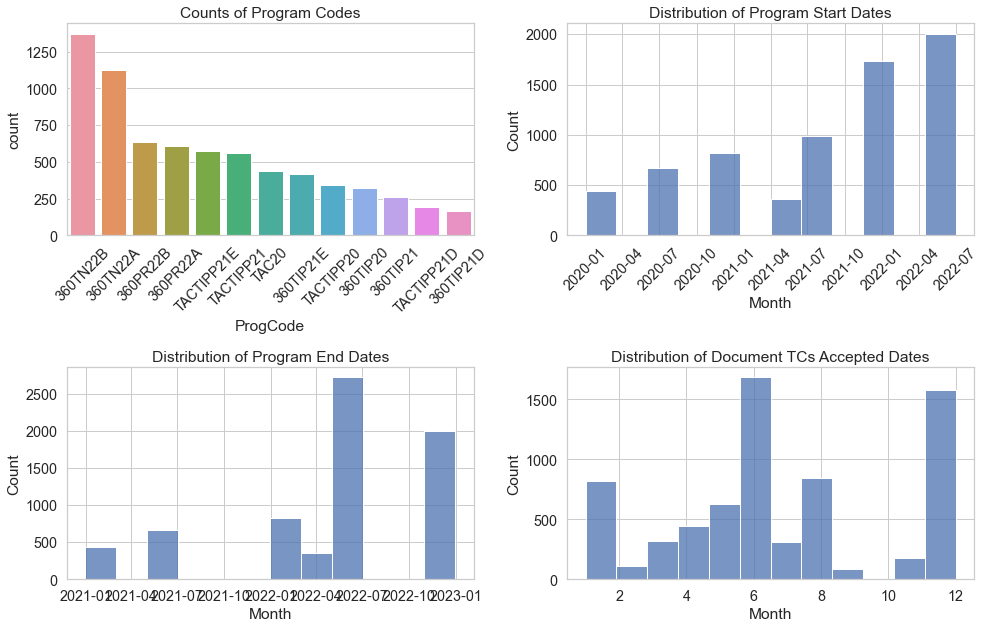

In [283]:
date_columns = ['ProgStartDate', 'ProgEndDate', 'DocTCsAcceptedDate']
for col in date_columns:
    cleaned_progreg_df[col] = pd.to_datetime(cleaned_progreg_df[col])
sns.set_style("whitegrid")

plt.figure(figsize=(14, 9))
plt.subplot(2, 2, 1)
sns.countplot(data=cleaned_progreg_df, x='ProgCode', order = cleaned_progreg_df['ProgCode'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Counts of Program Codes')

plt.subplot(2, 2, 2)
sns.histplot(cleaned_progreg_df['ProgStartDate'], bins=12)
plt.title('Distribution of Program Start Dates')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.histplot(cleaned_progreg_df['ProgEndDate'], bins=12)
plt.title('Distribution of Program End Dates')
plt.xlabel('Month')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.histplot(cleaned_progreg_df['DocTCsAcceptedDate'].dt.month, bins=12)
plt.title('Distribution of Document TCs Accepted Dates')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/var/folders/wc/q1ymn9sj19v03d48ys7nf4dw0000gn/T/ipykernel_67698/2893530828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_progreg_df['duration'] = cleaned_progreg_df['ProgEndDate'] - cleaned_progreg_df['ProgStartDate']
/var/folders/wc/q1ymn9sj19v03d48ys7nf4dw0000gn/T/ipykernel_67698/2893530828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_progreg_df['duration'] = cleaned_progreg_df['duration'].dt.days


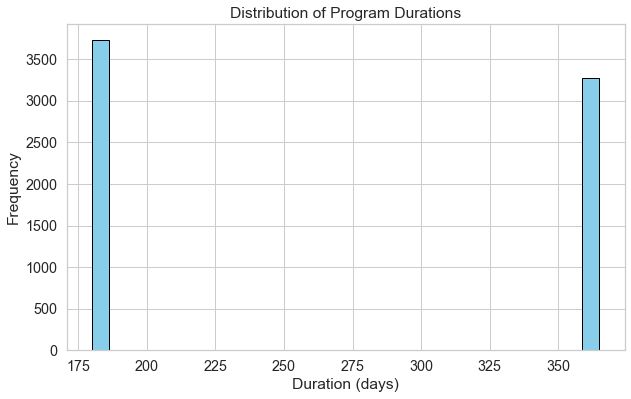

In [284]:
cleaned_progreg_df['duration'] = cleaned_progreg_df['ProgEndDate'] - cleaned_progreg_df['ProgStartDate']
cleaned_progreg_df['duration'] = cleaned_progreg_df['duration'].dt.days

plt.figure(figsize=(10, 6))
plt.hist(cleaned_progreg_df['duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Program Durations')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [285]:
duration_counts = cleaned_progreg_df['duration'].value_counts()
duration_counts

364    2841
183    2006
180    1731
365     437
Name: duration, dtype: int64

#### 4. Analysis of Clinic Data across states

In [286]:
progreg_by_clinic_df = pd.DataFrame(cleaned_progreg_df.groupby('ClinID')['ProgCode'].apply(list)).rename(columns={'ProgCode' : 'Programs'})
progreg_by_clinic_df

Programs
ClinID                                                                
0052ca6f645bd8afb2d184037                                   [360TN22A]
005555daab005c69eefb0f0a8  [360TIP20, TACTIPP21E, 360TIP21E, 360TN22B]
006d5212f8eca7116b3759e5b                  [360TN22A, TAC20, 360TN22B]
008783bf5c9e50587d829aac6                                  [360TIP21E]
008872a092adf36d790fb0339    [360TIP21D, 360TIP20, 360TN22B, 360TN22A]
...                                                                ...
ffa4c13cfbc4940f8cdf0dcc5                        [360TIP21E, 360TN22B]
ffb9502764156cf9960bfc17a             [TACTIPP21D, 360TN22B, 360TN22A]
ffcce140156215ca5b425d450                                 [TACTIPP21D]
ffd18c648803ff7d87fda8f48              [TACTIPP21, 360TN22A, 360TN22B]
fff41e806b27c9674dde79ca1                         [360TN22B, 360TN22A]

[3554 rows x 1 columns]

In [287]:
try:
    clinic_order_metrics_df.set_index('ClinID', inplace=True, drop=True)
except:
    pass
clinic_order_metrics_df

Average_CCAsWithTouchUp  \
ClinID                                               
004982089bd1ecf431bcc70ae                 1.296296   
0052ca6f645bd8afb2d184037                10.160000   
005555daab005c69eefb0f0a8                10.000000   
006d5212f8eca7116b3759e5b                15.882353   
007e33d579d4534505f23dde0                 1.000000   
...                                            ...   
ffa4c13cfbc4940f8cdf0dcc5                 5.693878   
ffb9502764156cf9960bfc17a                11.725490   
ffcce140156215ca5b425d450                 6.234043   
ffd18c648803ff7d87fda8f48                10.489796   
fff41e806b27c9674dde79ca1                 6.720000   

                           Days_Between_First_and_Last_Order  \
ClinID                                                         
004982089bd1ecf431bcc70ae                               1520   
0052ca6f645bd8afb2d184037                               1520   
005555daab005c69eefb0f0a8                               1520   
006d5212f8eca7116b3759e5b                               1520   
007e33d579d4534505f23dde0                                  0   
...                                                      ...   
ffa4c13cfbc4940f8cdf0dcc5                               1520   
ffb9502764156cf9960bfc17a                               1520   
ffcce140156215ca5b425d450                               1520   
ffd18c648803ff7d87fda8f48                               1520   
fff41e806b27c9674dde79ca1                               1520   

                           Number_Of_Times_Ordered Time_First_Order  \
ClinID                                                                
004982089bd1ecf431bcc70ae                       27       2019-01-01   
0052ca6f645bd8afb2d184037                       50       2019-01-01   
005555daab005c69eefb0f0a8                       50       2019-01-01   
006d5212f8eca7116b3759e5b                       51       2019-01-01   
007e33d579d4534505f23dde0                        1       2021-07-01   
...                                            ...              ...   
ffa4c13cfbc4940f8cdf0dcc5                       49       2019-01-01   
ffb9502764156cf9960bfc17a                       51       2019-01-01   
ffcce140156215ca5b425d450                       47       2019-01-01   
ffd18c648803ff7d87fda8f48                       49       2019-01-01   
fff41e806b27c9674dde79ca1                       50       2019-01-01   

                          Time_Last_Order  Is_Ordering  
ClinID                                                  
004982089bd1ecf431bcc70ae      2023-03-01        False  
0052ca6f645bd8afb2d184037      2023-03-01        False  
005555daab005c69eefb0f0a8      2023-03-01        False  
006d5212f8eca7116b3759e5b      2023-03-01        False  
007e33d579d4534505f23dde0      2021-07-01        False  
...                                   ...          ...  
ffa4c13cfbc4940f8cdf0dcc5      2023-03-01        False  
ffb9502764156cf9960bfc17a      2023-03-01        False  
ffcce140156215ca5b425d450      2023-03-01        False  
ffd18c648803ff7d87fda8f48      2023-03-01        False  
fff41e806b27c9674dde79ca1      2023-03-01        False  

[5117 rows x 6 columns]

In [288]:
extracted_contacts_data = contacts_df[['ClinID', 'State', 'Year', 'Month', 'CertificationDate']].set_index('ClinID', drop=True).dropna()
extracted_contacts_data

State  Year  Month CertificationDate
ClinID                                                                  
0e9bc464c15a91c8ee2e3b477    South Dakota  2016      7        2016-07-01
c0dfc68693275e37731c35149      California  2017      6        2017-06-05
4cb3a52529154955043600abf         Florida  2018      8        2018-08-09
ccc19770f3a2be9b486caa077        Virginia  2017      6        2017-06-06
62dfffa31393ac3f70a898e28              ON  2017      6        2017-06-28
...                                   ...   ...    ...               ...
50053fb4bccc6863d497d575a        Michigan  2021      1        2021-01-14
c1b270b9a5f25752b9585be62      California  2020      7        2020-07-31
ae482d9a241d0ede1e121f39b              ON  2021     12        2021-12-09
dddb5161cd5ff437f8a1e32af         Georgia  2021      4        2021-04-26
abcba7d1d24c7bc28d64d0f4f  South Carolina  2022      2        2022-02-11

[4970 rows x 4 columns]

In [289]:
mergedData = pd.merge(clinic_order_metrics_df, progreg_by_clinic_df, how='inner', on = 'ClinID').merge(extracted_contacts_data, how='inner', on = 'ClinID')
mergedData.head()

Average_CCAsWithTouchUp  \
ClinID                                               
0052ca6f645bd8afb2d184037                10.160000   
005555daab005c69eefb0f0a8                10.000000   
006d5212f8eca7116b3759e5b                15.882353   
008783bf5c9e50587d829aac6                 1.333333   
008872a092adf36d790fb0339                 5.652174   

                           Days_Between_First_and_Last_Order  \
ClinID                                                         
0052ca6f645bd8afb2d184037                               1520   
005555daab005c69eefb0f0a8                               1520   
006d5212f8eca7116b3759e5b                               1520   
008783bf5c9e50587d829aac6                               1520   
008872a092adf36d790fb0339                               1520   

                           Number_Of_Times_Ordered Time_First_Order  \
ClinID                                                                
0052ca6f645bd8afb2d184037                       50       2019-01-01   
005555daab005c69eefb0f0a8                       50       2019-01-01   
006d5212f8eca7116b3759e5b                       51       2019-01-01   
008783bf5c9e50587d829aac6                       27       2019-01-01   
008872a092adf36d790fb0339                       46       2019-01-01   

                          Time_Last_Order  Is_Ordering  \
ClinID                                                   
0052ca6f645bd8afb2d184037      2023-03-01        False   
005555daab005c69eefb0f0a8      2023-03-01        False   
006d5212f8eca7116b3759e5b      2023-03-01        False   
008783bf5c9e50587d829aac6      2023-03-01        False   
008872a092adf36d790fb0339      2023-03-01        False   

                                                              Programs  \
ClinID                                                                   
0052ca6f645bd8afb2d184037                                   [360TN22A]   
005555daab005c69eefb0f0a8  [360TIP20, TACTIPP21E, 360TIP21E, 360TN22B]   
006d5212f8eca7116b3759e5b                  [360TN22A, TAC20, 360TN22B]   
008783bf5c9e50587d829aac6                                  [360TIP21E]   
008872a092adf36d790fb0339    [360TIP21D, 360TIP20, 360TN22B, 360TN22A]   

                                State  Year  Month CertificationDate  
ClinID                                                                
0052ca6f645bd8afb2d184037  California  2008      4        2008-04-28  
005555daab005c69eefb0f0a8     Georgia  2000      7        2000-07-21  
006d5212f8eca7116b3759e5b       Idaho  2010      1        2010-01-27  
008783bf5c9e50587d829aac6        Ohio  2014      6        2014-06-13  
008872a092adf36d790fb0339  California  2011      4        2011-04-06

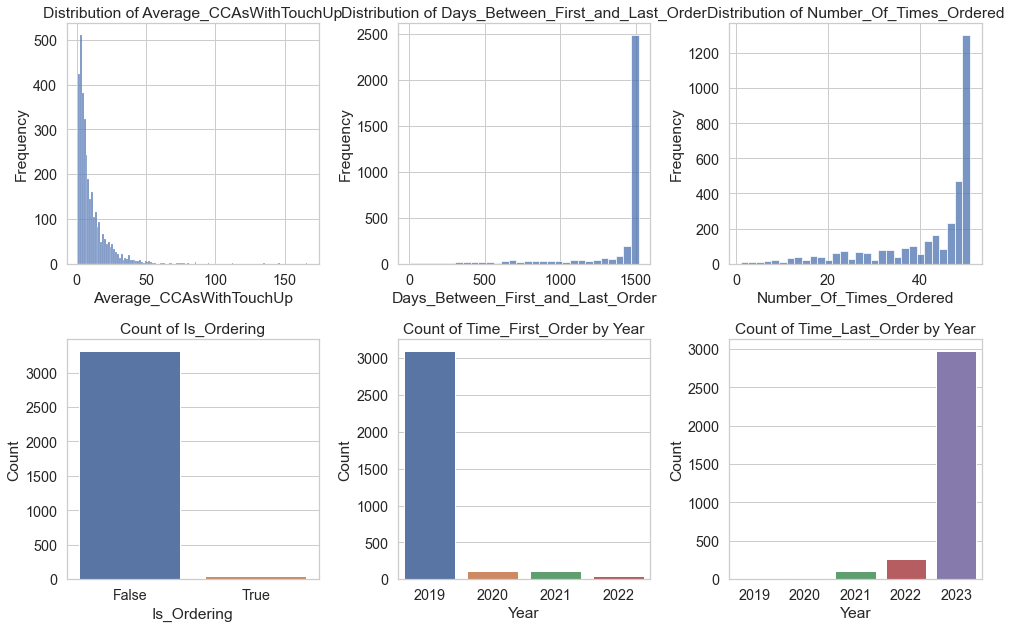

In [290]:
plt.figure(figsize=(14, 9))
plt.subplot(2, 3, 1)
sns.histplot(mergedData['Average_CCAsWithTouchUp'])
plt.title('Distribution of Average_CCAsWithTouchUp')
plt.xlabel('Average_CCAsWithTouchUp')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
sns.histplot(mergedData['Days_Between_First_and_Last_Order'], bins=30)
plt.title('Distribution of Days_Between_First_and_Last_Order')
plt.xlabel('Days_Between_First_and_Last_Order')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
sns.histplot(mergedData['Number_Of_Times_Ordered'], bins=30)
plt.title('Distribution of Number_Of_Times_Ordered')
plt.xlabel('Number_Of_Times_Ordered')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.countplot(data=mergedData, x='Is_Ordering')
plt.title('Count of Is_Ordering')
plt.ylabel('Count')

plt.subplot(2, 3, 5)
sns.countplot(data=mergedData, x=mergedData['Time_First_Order'].dt.year)
plt.title('Count of Time_First_Order by Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.subplot(2, 3, 6)
sns.countplot(data=mergedData, x=mergedData['Time_Last_Order'].dt.year)
plt.title('Count of Time_Last_Order by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [291]:
cols = ['Average_CCAsWithTouchUp', 'Days_Between_First_and_Last_Order', 'Number_Of_Times_Ordered', 'Is_Ordering']
state_grouped_continuous = mergedData.groupby('State')[cols].mean().reset_index()
state_grouped_continuous.head()

State  Average_CCAsWithTouchUp  Days_Between_First_and_Last_Order  \
0   Alabama                 9.213344                        1434.805556   
1    Alaska                 8.091500                        1259.285714   
2   Alberta                16.956004                        1430.064516   
3   Arizona                11.483950                        1348.660377   
4  Arkansas                11.780478                        1434.809524   

   Number_Of_Times_Ordered  Is_Ordering  
0                44.250000     0.000000  
1                38.285714     0.000000  
2                44.516129     0.000000  
3                41.132075     0.018868  
4                42.761905     0.000000

In [292]:
mergedData = mergedData.sort_values('Average_CCAsWithTouchUp')
mergedData.head()

Average_CCAsWithTouchUp  \
ClinID                                               
2174060443cd5ea53f8a0d146                      1.0   
b357451e810524dd4c868a377                      1.0   
b32cd3d4ce94d27eb3c295968                      1.0   
2e7358005b024a0003258f408                      1.0   
be0cdf814e1d868b8677aed6d                      1.0   

                           Days_Between_First_and_Last_Order  \
ClinID                                                         
2174060443cd5ea53f8a0d146                                214   
b357451e810524dd4c868a377                                245   
b32cd3d4ce94d27eb3c295968                                150   
2e7358005b024a0003258f408                                  0   
be0cdf814e1d868b8677aed6d                                669   

                           Number_Of_Times_Ordered Time_First_Order  \
ClinID                                                                
2174060443cd5ea53f8a0d146                        3       2022-06-01   
b357451e810524dd4c868a377                        3       2019-03-01   
b32cd3d4ce94d27eb3c295968                        3       2021-02-01   
2e7358005b024a0003258f408                        1       2021-05-01   
be0cdf814e1d868b8677aed6d                        5       2019-02-01   

                          Time_Last_Order  Is_Ordering      Programs  \
ClinID                                                                 
2174060443cd5ea53f8a0d146      2023-01-01        False   [360TIP21E]   
b357451e810524dd4c868a377      2019-11-01        False   [360TIP21E]   
b32cd3d4ce94d27eb3c295968      2021-07-01        False   [360TIP21E]   
2e7358005b024a0003258f408      2021-05-01        False   [360TIP21E]   
be0cdf814e1d868b8677aed6d      2020-12-01        False  [TACTIPP21E]   

                                State  Year  Month CertificationDate  
ClinID                                                                
2174060443cd5ea53f8a0d146    Michigan  2018     12        2018-12-07  
b357451e810524dd4c868a377  New Jersey  2000      5        2000-05-19  
b32cd3d4ce94d27eb3c295968     Arizona  2020     11        2020-11-17  
2e7358005b024a0003258f408  California  1999     10        1999-10-29  
be0cdf814e1d868b8677aed6d  California  2000     10        2000-10-01

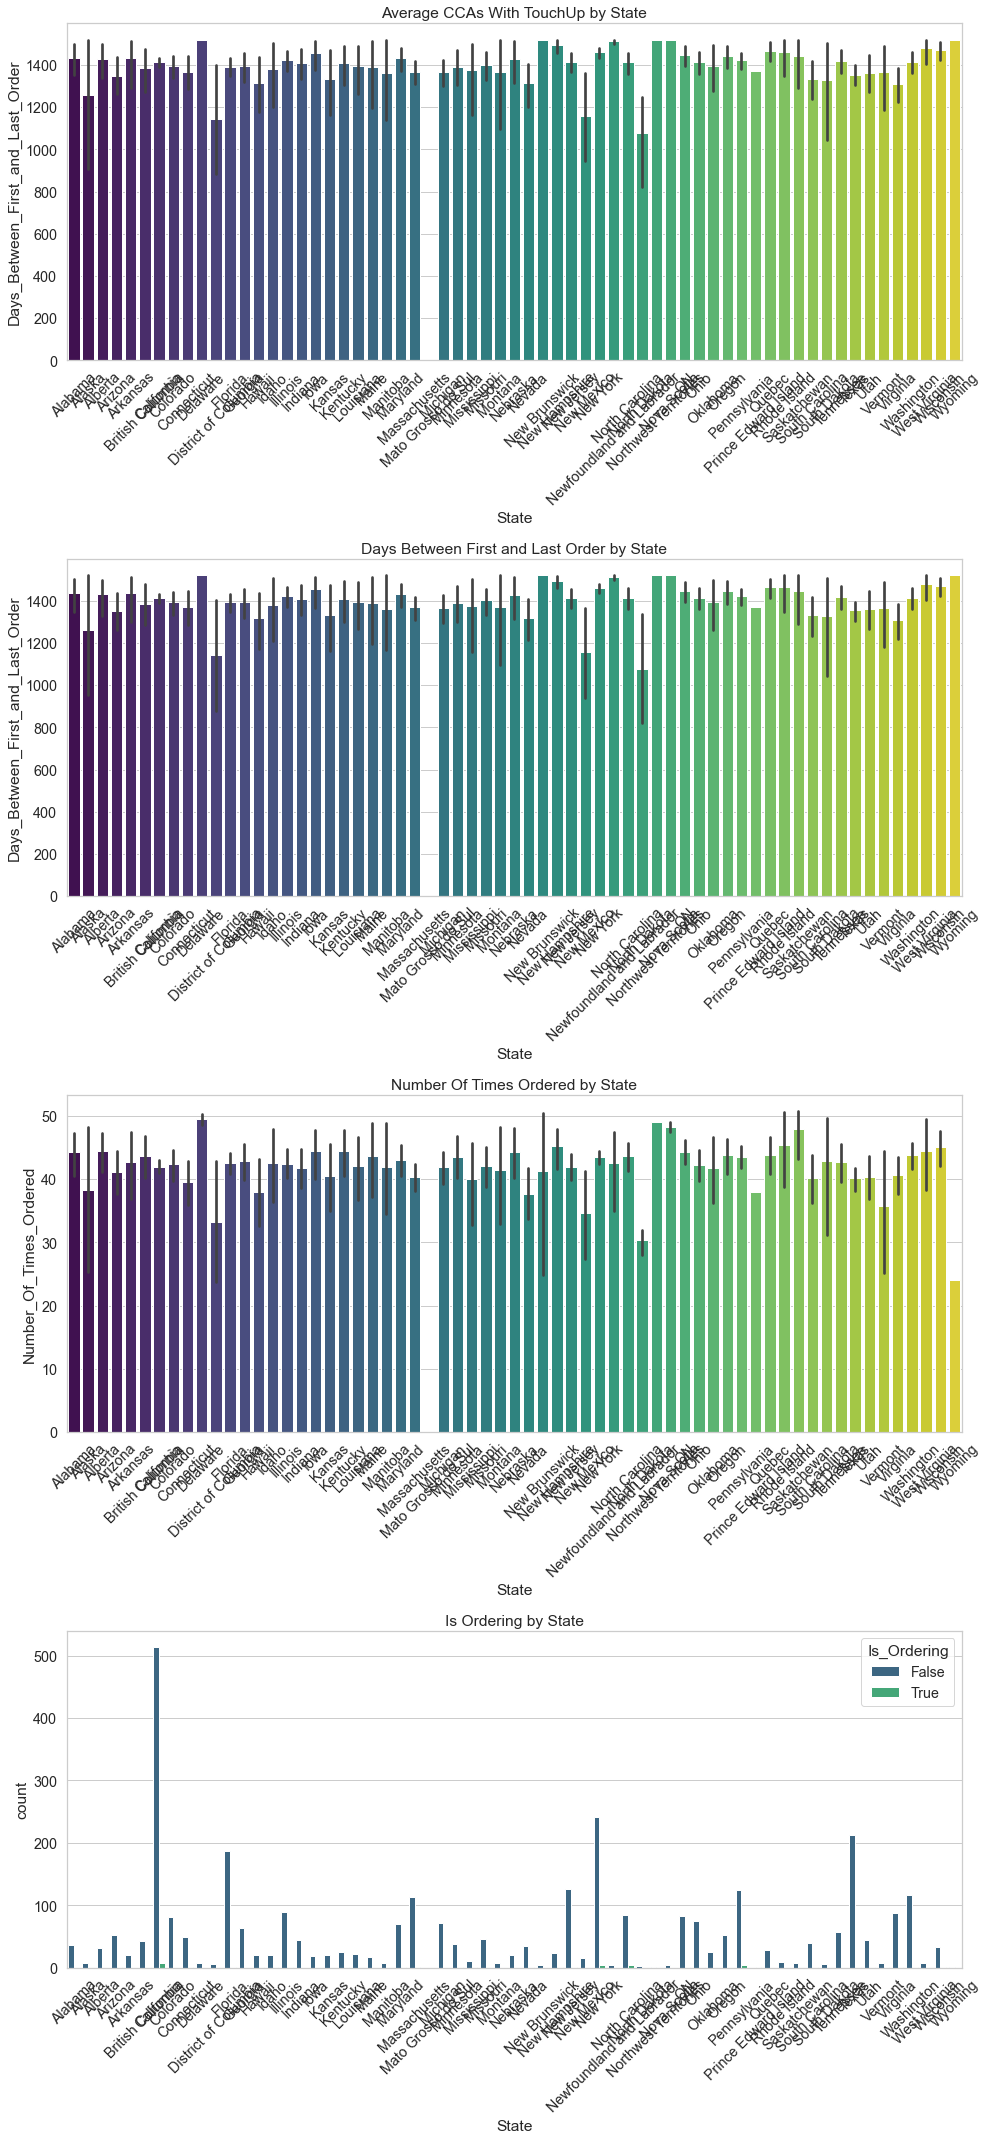

In [293]:
plt.figure(figsize=(14, 30))
plt.subplot(4, 1, 1)
sns.barplot(data=mergedData, x='State', y='Days_Between_First_and_Last_Order', palette='viridis')
plt.xticks(rotation=45)
plt.title('Average CCAs With TouchUp by State')

plt.subplot(4, 1, 2)
sns.barplot(data=mergedData, x='State', y='Days_Between_First_and_Last_Order', palette='viridis')
plt.xticks(rotation=45)
plt.title('Days Between First and Last Order by State')

plt.subplot(4, 1, 3)
sns.barplot(data=mergedData, x='State', y='Number_Of_Times_Ordered', palette='viridis')
plt.xticks(rotation=45)
plt.title('Number Of Times Ordered by State')

plt.subplot(4, 1, 4)
sns.countplot(data=mergedData, x='State', hue='Is_Ordering', palette='viridis')
plt.xticks(rotation=45)
plt.title('Is Ordering by State')
plt.tight_layout()
plt.show()

### Merged contacts_wap + orders_wap + progreg EDA

Objective:
- merge all trhe data sets into one and conduct time series analysis for each user

In [294]:
extracted_contacts = contacts_df[['ClinID', 'State']]
extracted_contacts

ClinID           State
0     0e9bc464c15a91c8ee2e3b477    South Dakota
1     c0dfc68693275e37731c35149      California
2     4cb3a52529154955043600abf         Florida
3     ccc19770f3a2be9b486caa077        Virginia
4     62dfffa31393ac3f70a898e28              ON
...                         ...             ...
4965  50053fb4bccc6863d497d575a        Michigan
4966  c1b270b9a5f25752b9585be62      California
4967  ae482d9a241d0ede1e121f39b              ON
4968  dddb5161cd5ff437f8a1e32af         Georgia
4969  abcba7d1d24c7bc28d64d0f4f  South Carolina

[4970 rows x 2 columns]

In [295]:
extracted_orders_df = orders_df.sort_values(['ClinID', 'MonthStartDate']).set_index(['ClinID'], drop = True).copy()
extracted_orders_df['MonthStartDate'] = pd.to_datetime(extracted_orders_df['MonthStartDate'])
extracted_orders_df.reset_index(inplace=True)
extracted_orders_df

ClinID MonthStartDate  CCAs  CCAsTeen  CCAsiTero  \
0       004982089bd1ecf431bcc70ae     2019-01-01     1         0          0   
1       004982089bd1ecf431bcc70ae     2019-02-01     1         0          0   
2       004982089bd1ecf431bcc70ae     2019-04-01     2         0          0   
3       004982089bd1ecf431bcc70ae     2019-05-01     2         0          0   
4       004982089bd1ecf431bcc70ae     2019-09-01     1         0          0   
...                           ...            ...   ...       ...        ...   
195582  fff41e806b27c9674dde79ca1     2022-11-01     4         1          4   
195583  fff41e806b27c9674dde79ca1     2022-12-01     6         5          6   
195584  fff41e806b27c9674dde79ca1     2023-01-01     5         4          5   
195585  fff41e806b27c9674dde79ca1     2023-02-01     3         1          3   
195586  fff41e806b27c9674dde79ca1     2023-03-01     9         5          9   

        CCAsComplex  MonthStart  YearStart  
0                 0           1       2019  
1                 0           2       2019  
2                 0           4       2019  
3                 1           5       2019  
4                 0           9       2019  
...             ...         ...        ...  
195582            0          11       2022  
195583            2          12       2022  
195584            2           1       2023  
195585            0           2       2023  
195586            2           3       2023  

[195587 rows x 8 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x432 with 0 Axes>

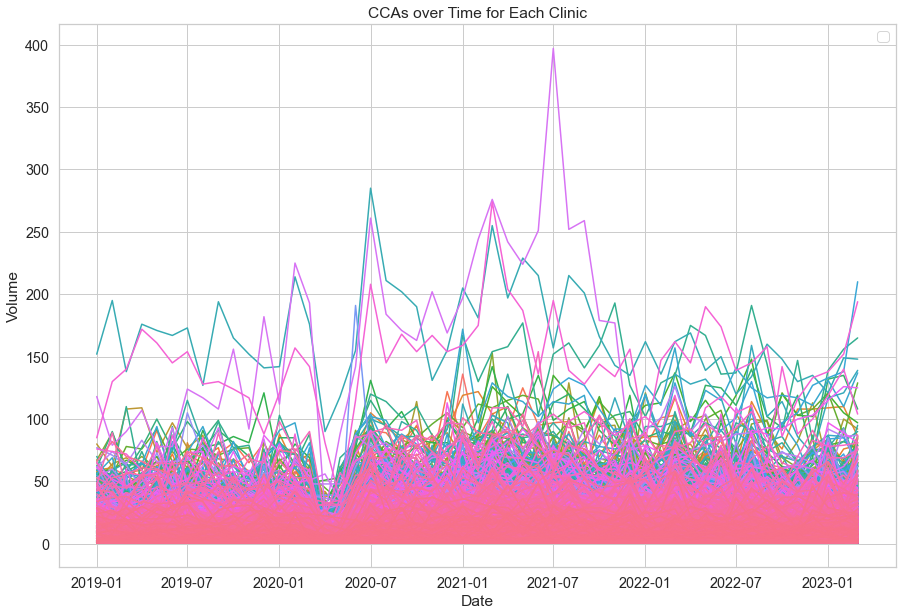

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


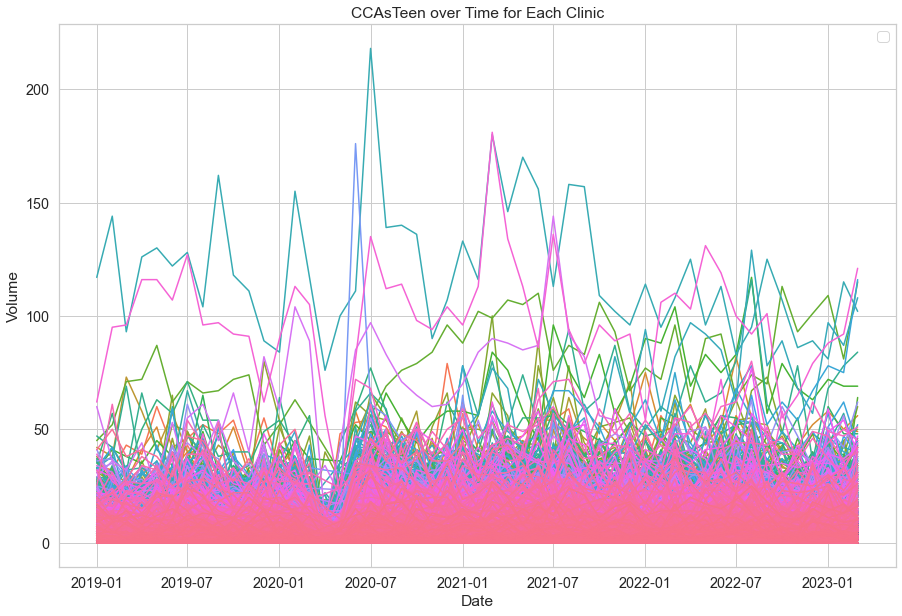

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


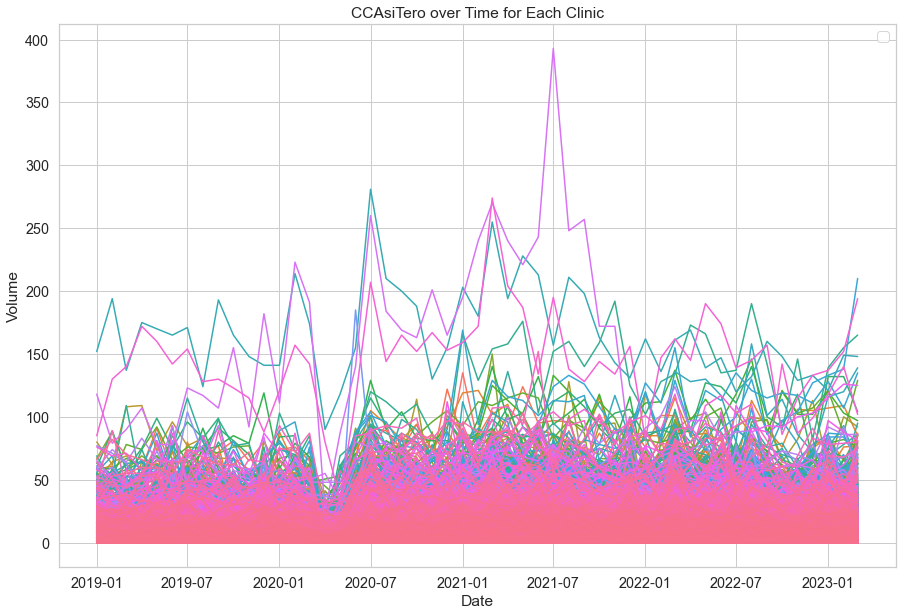

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


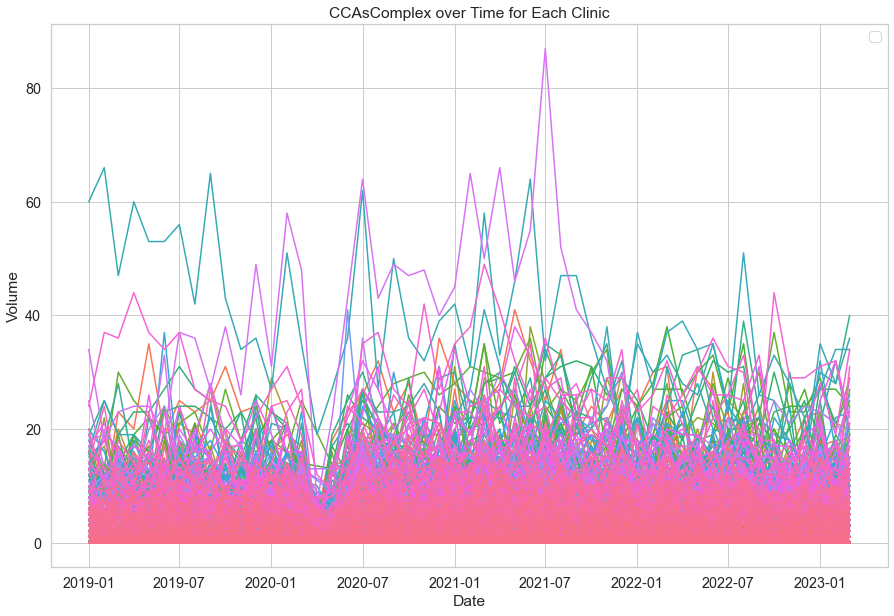

/var/folders/wc/q1ymn9sj19v03d48ys7nf4dw0000gn/T/ipykernel_67698/1813572360.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cca_data['Month'] = cca_data.index.month


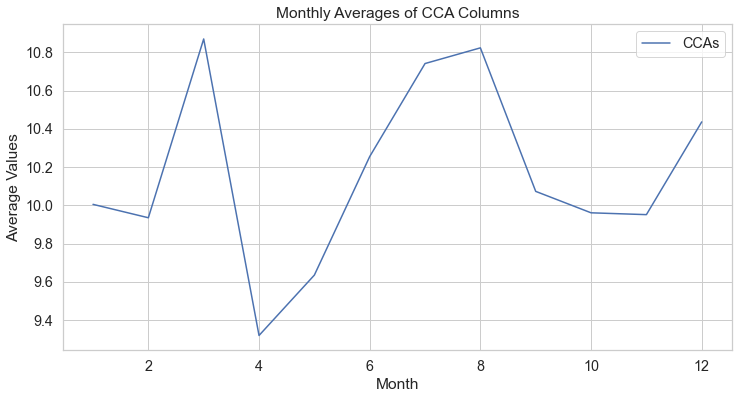

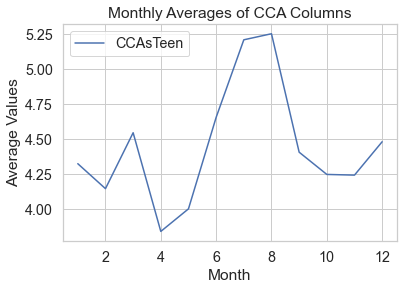

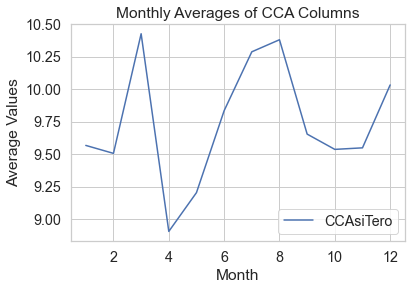

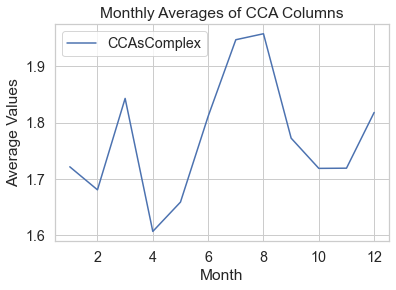

In [296]:
extracted_orders_df['MonthStartDate'] = pd.to_datetime(extracted_orders_df['MonthStartDate'])
extracted_orders_df.set_index('MonthStartDate', inplace=True)

cca_columns = [col for col in extracted_orders_df.columns if 'CCA' in col]
cca_data = extracted_orders_df[cca_columns]

plt.figure(figsize=(12, 6))
for col in cca_columns:
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 10))
    sns.lineplot(data=extracted_orders_df, x=extracted_orders_df.index, y=col, hue='ClinID', legend=None)
    plt.title(col + ' over Time for Each Clinic')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

cca_data['Month'] = cca_data.index.month
monthly_averages = cca_data.groupby('Month').mean()

plt.figure(figsize=(12, 6))
for col in cca_columns:
    plt.plot(monthly_averages.index, monthly_averages[col], label=col)

    plt.title('Monthly Averages of CCA Columns')
    plt.xlabel('Month')
    plt.ylabel('Average Values')
    plt.legend()
    plt.show()

In [297]:
extracted_orders_df = extracted_orders_df.reset_index()
extracted_orders_df = extracted_orders_df.set_index('ClinID')

In [298]:
temp_df = extracted_orders_df.groupby('ClinID').count()
temp_df = temp_df[temp_df['CCAs'] < 24]
clinIDs = temp_df.index
extracted_orders_df = extracted_orders_df.drop(clinIDs, axis = 0)


In [299]:
extracted_orders_df.reset_index(inplace=True)
extracted_orders_df

ClinID MonthStartDate  CCAs  CCAsTeen  CCAsiTero  \
0       004982089bd1ecf431bcc70ae     2019-01-01     1         0          0   
1       004982089bd1ecf431bcc70ae     2019-02-01     1         0          0   
2       004982089bd1ecf431bcc70ae     2019-04-01     2         0          0   
3       004982089bd1ecf431bcc70ae     2019-05-01     2         0          0   
4       004982089bd1ecf431bcc70ae     2019-09-01     1         0          0   
...                           ...            ...   ...       ...        ...   
182292  fff41e806b27c9674dde79ca1     2022-11-01     4         1          4   
182293  fff41e806b27c9674dde79ca1     2022-12-01     6         5          6   
182294  fff41e806b27c9674dde79ca1     2023-01-01     5         4          5   
182295  fff41e806b27c9674dde79ca1     2023-02-01     3         1          3   
182296  fff41e806b27c9674dde79ca1     2023-03-01     9         5          9   

        CCAsComplex  MonthStart  YearStart  
0                 0           1       2019  
1                 0           2       2019  
2                 0           4       2019  
3                 1           5       2019  
4                 0           9       2019  
...             ...         ...        ...  
182292            0          11       2022  
182293            2          12       2022  
182294            2           1       2023  
182295            0           2       2023  
182296            2           3       2023  

[182297 rows x 8 columns]

In [300]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming the DataFrame is loaded as extracted_orders_df
extracted_orders_df['MonthStartDate'] = pd.to_datetime(extracted_orders_df['MonthStartDate'])
extracted_orders_df.set_index(['ClinID', 'MonthStartDate'], inplace=True)

# Identify CCA columns
cca_columns = [col for col in extracted_orders_df.columns if 'CCA' in col]

# Function to adjust each CCA column for seasonality
def adjust_seasonality(group):

    seasonally_adjusted_group = group.copy()
    for col in cca_columns:
        decomposed = seasonal_decompose(group[col], model='additive', period=12)
        seasonally_adjusted_group[col] = group[col] - decomposed.seasonal
    return seasonally_adjusted_group

# Apply the function to each group (i.e., each ClinicID)
seasonally_adjusted_data = extracted_orders_df.groupby('ClinID').apply(adjust_seasonality)

# Resetting index to make ClinicID a column again
seasonally_adjusted_data.reset_index(inplace=True)

# Display the first few rows of the seasonally adjusted DataFrame
print(seasonally_adjusted_data.head())


/var/folders/wc/q1ymn9sj19v03d48ys7nf4dw0000gn/T/ipykernel_67698/2350431858.py:21: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  seasonally_adjusted_data = extracted_orders_df.groupby('ClinID').apply(adjust_seasonality)


                      ClinID MonthStartDate      CCAs  CCAsTeen  CCAsiTero  \
0  004982089bd1ecf431bcc70ae     2019-01-01  0.338542  0.166667        0.0   
1  004982089bd1ecf431bcc70ae     2019-02-01  1.338542  0.166667        0.0   
2  004982089bd1ecf431bcc70ae     2019-04-01  1.338542  0.125000        0.0   
3  004982089bd1ecf431bcc70ae     2019-05-01  2.296875  0.083333        0.0   
4  004982089bd1ecf431bcc70ae     2019-09-01  0.255208  0.041667        0.0   

   CCAsComplex  MonthStart  YearStart  
0    -0.013889           1       2019  
1    -0.013889           2       2019  
2    -0.013889           4       2019  
3     0.986111           5       2019  
4    -0.013889           9       2019  


In [301]:
seasonally_adjusted_data

ClinID MonthStartDate      CCAs  CCAsTeen  \
0       004982089bd1ecf431bcc70ae     2019-01-01  0.338542  0.166667   
1       004982089bd1ecf431bcc70ae     2019-02-01  1.338542  0.166667   
2       004982089bd1ecf431bcc70ae     2019-04-01  1.338542  0.125000   
3       004982089bd1ecf431bcc70ae     2019-05-01  2.296875  0.083333   
4       004982089bd1ecf431bcc70ae     2019-09-01  0.255208  0.041667   
...                           ...            ...       ...       ...   
182292  fff41e806b27c9674dde79ca1     2022-11-01  5.111690  2.393519   
182293  fff41e806b27c9674dde79ca1     2022-12-01  2.583912  3.129630   
182294  fff41e806b27c9674dde79ca1     2023-01-01  5.695023  3.851852   
182295  fff41e806b27c9674dde79ca1     2023-02-01  3.500579  2.643519   
182296  fff41e806b27c9674dde79ca1     2023-03-01  6.528356  2.976852   

        CCAsiTero  CCAsComplex  MonthStart  YearStart  
0        0.000000    -0.013889           1       2019  
1        0.000000    -0.013889           2       2019  
2        0.000000    -0.013889           4       2019  
3        0.000000     0.986111           5       2019  
4        0.000000    -0.013889           9       2019  
...           ...          ...         ...        ...  
182292   5.074653    -0.692708          11       2022  
182293   2.880208     1.293403          12       2022  
182294   5.657986     1.571181           1       2023  
182295   3.449653     0.237847           2       2023  
182296   6.463542     1.543403           3       2023  

[182297 rows x 8 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 864x432 with 0 Axes>

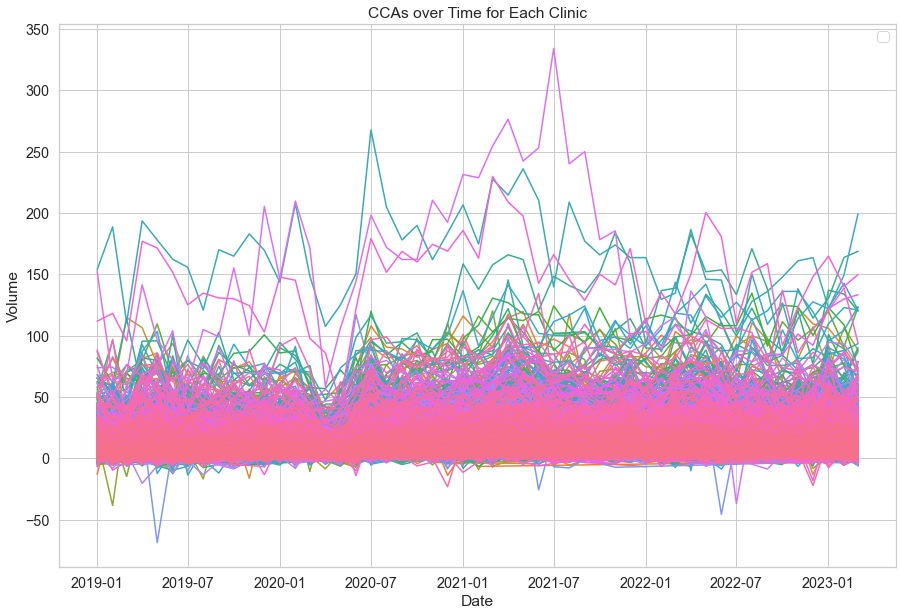

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


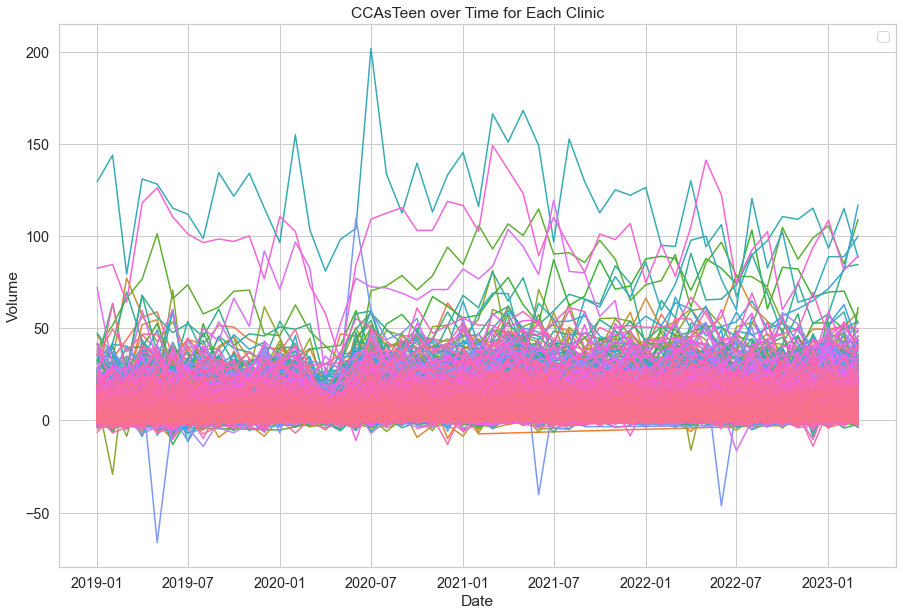

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


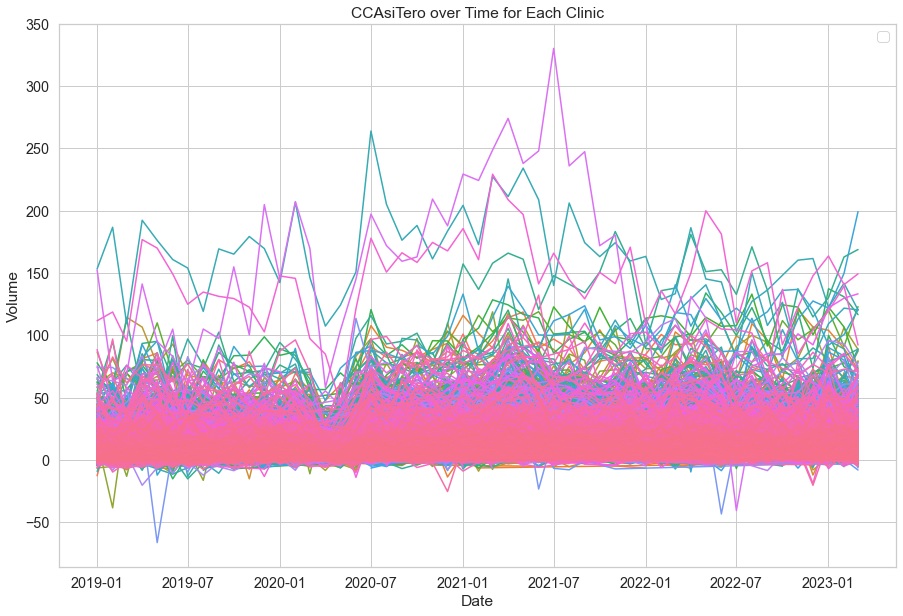

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


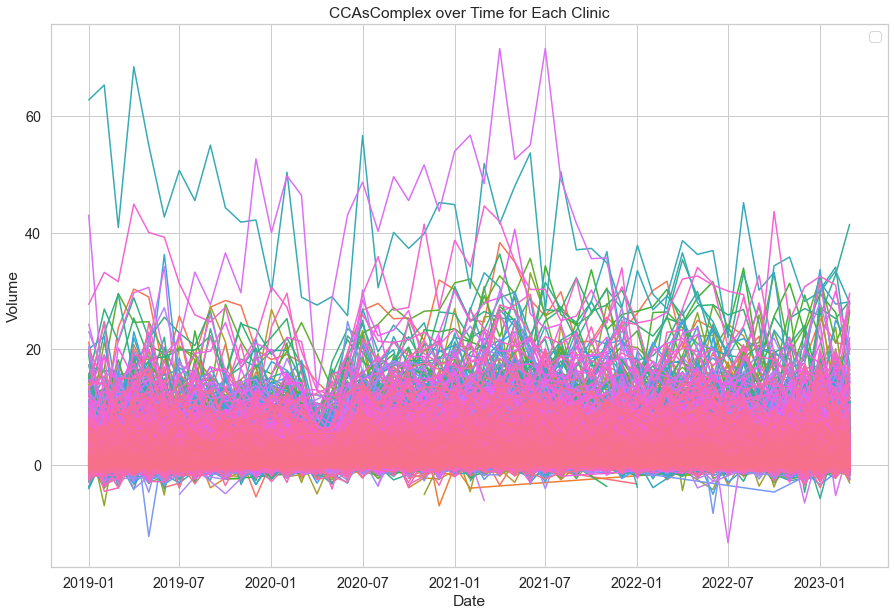

/var/folders/wc/q1ymn9sj19v03d48ys7nf4dw0000gn/T/ipykernel_67698/2224403337.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cca_data['Month'] = cca_data.index.month


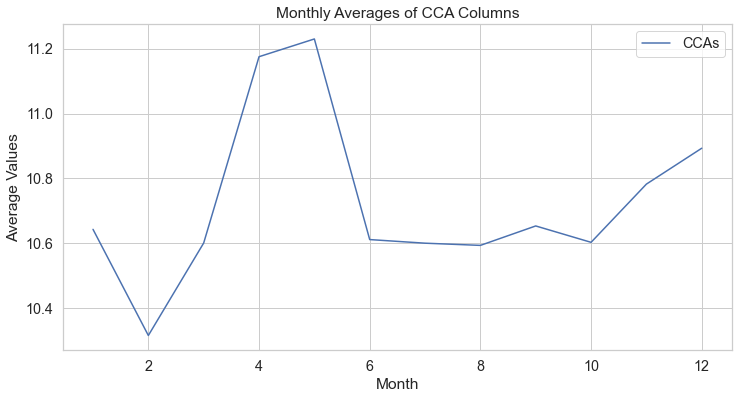

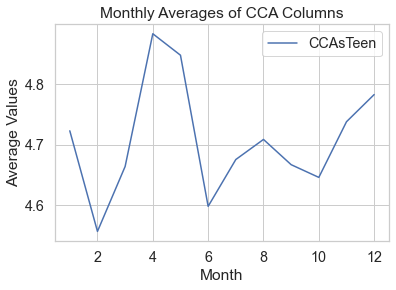

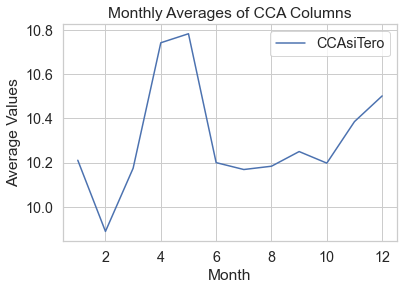

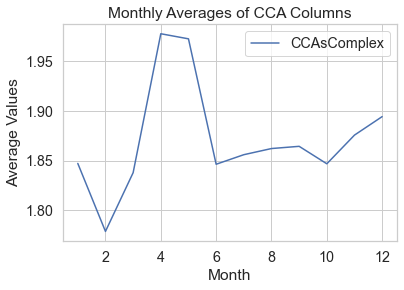

In [302]:
seasonally_adjusted_data['MonthStartDate'] = pd.to_datetime(seasonally_adjusted_data['MonthStartDate'])
seasonally_adjusted_data.set_index('MonthStartDate', inplace=True)

cca_columns = [col for col in seasonally_adjusted_data.columns if 'CCA' in col]
cca_data = seasonally_adjusted_data[cca_columns]

plt.figure(figsize=(12, 6))
for col in cca_columns:
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 10))
    sns.lineplot(data=seasonally_adjusted_data, x=seasonally_adjusted_data.index, y=col, hue='ClinID', legend=None)
    plt.title(col + ' over Time for Each Clinic')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

cca_data['Month'] = cca_data.index.month
monthly_averages = cca_data.groupby('Month').mean()

plt.figure(figsize=(12, 6))
for col in cca_columns:
    plt.plot(monthly_averages.index, monthly_averages[col], label=col)

    plt.title('Monthly Averages of CCA Columns')
    plt.xlabel('Month')
    plt.ylabel('Average Values')
    plt.legend()
    plt.show()

In [303]:
extracted_orders_df = seasonally_adjusted_data

In [304]:
extracted_progreg_df = cleaned_progreg_df.copy()


In [305]:
extracted_progreg_df = cleaned_progreg_df.sort_values(by = ['ClinID', 'ProgStartDate', 'ProgStartDate'])
extracted_progreg_df.drop(['DocParticipantStatus', 'CountryGroup', 'DocParticipantStatus'], axis = 1)
extracted_progreg_df = extracted_progreg_df.groupby(['ClinID', 'ProgStartDate', 'ProgEndDate'])['ProgCode'].apply(list)

extracted_progreg_df = pd.DataFrame(extracted_progreg_df)
extracted_progreg_df.reset_index(inplace=True)
extracted_progreg_df

ClinID ProgStartDate ProgEndDate  \
0     0052ca6f645bd8afb2d184037    2022-01-01  2022-06-30   
1     005555daab005c69eefb0f0a8    2020-07-01  2021-06-30   
2     005555daab005c69eefb0f0a8    2021-07-01  2022-06-30   
3     005555daab005c69eefb0f0a8    2022-07-01  2022-12-31   
4     006d5212f8eca7116b3759e5b    2020-01-01  2020-12-31   
...                         ...           ...         ...   
6977  ffd18c648803ff7d87fda8f48    2021-01-01  2021-12-31   
6978  ffd18c648803ff7d87fda8f48    2022-01-01  2022-06-30   
6979  ffd18c648803ff7d87fda8f48    2022-07-01  2022-12-31   
6980  fff41e806b27c9674dde79ca1    2022-01-01  2022-06-30   
6981  fff41e806b27c9674dde79ca1    2022-07-01  2022-12-31   

                     ProgCode  
0                  [360TN22A]  
1                  [360TIP20]  
2     [TACTIPP21E, 360TIP21E]  
3                  [360TN22B]  
4                     [TAC20]  
...                       ...  
6977              [TACTIPP21]  
6978               [360TN22A]  
6979               [360TN22B]  
6980               [360TN22A]  
6981               [360TN22B]  

[6982 rows x 4 columns]

In [306]:
extracted_progreg_df['ProgStartDate'] = pd.to_datetime(extracted_progreg_df['ProgStartDate'])
extracted_progreg_df['ProgEndDate'] = pd.to_datetime(extracted_progreg_df['ProgEndDate'])

## Calls Data

In [307]:
try:
    calls_df.drop(['Unnamed: 0'], axis = 1, inplace = True, )
except:
    pass
calls_df.head()

ClinID MonthStartDate             CallFocus  CallCount
0  22e12173ad043190f83cace61     2019-02-01  Doctor Not Available          1
1  a909580835e88cf45eb9b8b0f     2020-03-01        AP360/TAC/iPro          1
2  22e12173ad043190f83cace61     2019-03-01  Doctor Not Available          1
3  a89a0330d58f16ee103d83254     2021-08-01     Business Overview          1
4  22e12173ad043190f83cace61     2021-10-01     Business Overview          1

In [308]:
calls_df['MonthStartDate'] = pd.to_datetime(calls_df['MonthStartDate'])
calls_df

ClinID MonthStartDate             CallFocus  \
0       22e12173ad043190f83cace61     2019-02-01  Doctor Not Available   
1       a909580835e88cf45eb9b8b0f     2020-03-01        AP360/TAC/iPro   
2       22e12173ad043190f83cace61     2019-03-01  Doctor Not Available   
3       a89a0330d58f16ee103d83254     2021-08-01     Business Overview   
4       22e12173ad043190f83cace61     2021-10-01     Business Overview   
...                           ...            ...                   ...   
211623  aae5a754e2629abbc6dce01b8     2023-01-01   Promotions/Programs   
211624  d5f00f8e39aa4802218b6b973     2023-01-01      Education/Events   
211625  f1e6a1e1da496189f1177b1e3     2022-07-01     Business Overview   
211626  f1e6a1e1da496189f1177b1e3     2023-01-01     Business Overview   
211627  2f8fbfc64d673ed7fdfbd03de     2023-01-01     Business Overview   

        CallCount  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
211623          1  
211624          1  
211625          4  
211626          2  
211627          1  

[211628 rows x 4 columns]

# Merging Data Sets

In [309]:
extracted_contacts

ClinID           State
0     0e9bc464c15a91c8ee2e3b477    South Dakota
1     c0dfc68693275e37731c35149      California
2     4cb3a52529154955043600abf         Florida
3     ccc19770f3a2be9b486caa077        Virginia
4     62dfffa31393ac3f70a898e28              ON
...                         ...             ...
4965  50053fb4bccc6863d497d575a        Michigan
4966  c1b270b9a5f25752b9585be62      California
4967  ae482d9a241d0ede1e121f39b              ON
4968  dddb5161cd5ff437f8a1e32af         Georgia
4969  abcba7d1d24c7bc28d64d0f4f  South Carolina

[4970 rows x 2 columns]

In [310]:
extracted_progreg_df

ClinID ProgStartDate ProgEndDate  \
0     0052ca6f645bd8afb2d184037    2022-01-01  2022-06-30   
1     005555daab005c69eefb0f0a8    2020-07-01  2021-06-30   
2     005555daab005c69eefb0f0a8    2021-07-01  2022-06-30   
3     005555daab005c69eefb0f0a8    2022-07-01  2022-12-31   
4     006d5212f8eca7116b3759e5b    2020-01-01  2020-12-31   
...                         ...           ...         ...   
6977  ffd18c648803ff7d87fda8f48    2021-01-01  2021-12-31   
6978  ffd18c648803ff7d87fda8f48    2022-01-01  2022-06-30   
6979  ffd18c648803ff7d87fda8f48    2022-07-01  2022-12-31   
6980  fff41e806b27c9674dde79ca1    2022-01-01  2022-06-30   
6981  fff41e806b27c9674dde79ca1    2022-07-01  2022-12-31   

                     ProgCode  
0                  [360TN22A]  
1                  [360TIP20]  
2     [TACTIPP21E, 360TIP21E]  
3                  [360TN22B]  
4                     [TAC20]  
...                       ...  
6977              [TACTIPP21]  
6978               [360TN22A]  
6979               [360TN22B]  
6980               [360TN22A]  
6981               [360TN22B]  

[6982 rows x 4 columns]

In [311]:
extracted_orders_df

ClinID      CCAs  CCAsTeen  CCAsiTero  \
MonthStartDate                                                             
2019-01-01      004982089bd1ecf431bcc70ae  0.338542  0.166667   0.000000   
2019-02-01      004982089bd1ecf431bcc70ae  1.338542  0.166667   0.000000   
2019-04-01      004982089bd1ecf431bcc70ae  1.338542  0.125000   0.000000   
2019-05-01      004982089bd1ecf431bcc70ae  2.296875  0.083333   0.000000   
2019-09-01      004982089bd1ecf431bcc70ae  0.255208  0.041667   0.000000   
...                                   ...       ...       ...        ...   
2022-11-01      fff41e806b27c9674dde79ca1  5.111690  2.393519   5.074653   
2022-12-01      fff41e806b27c9674dde79ca1  2.583912  3.129630   2.880208   
2023-01-01      fff41e806b27c9674dde79ca1  5.695023  3.851852   5.657986   
2023-02-01      fff41e806b27c9674dde79ca1  3.500579  2.643519   3.449653   
2023-03-01      fff41e806b27c9674dde79ca1  6.528356  2.976852   6.463542   

                CCAsComplex  MonthStart  YearStart  
MonthStartDate                                      
2019-01-01        -0.013889           1       2019  
2019-02-01        -0.013889           2       2019  
2019-04-01        -0.013889           4       2019  
2019-05-01         0.986111           5       2019  
2019-09-01        -0.013889           9       2019  
...                     ...         ...        ...  
2022-11-01        -0.692708          11       2022  
2022-12-01         1.293403          12       2022  
2023-01-01         1.571181           1       2023  
2023-02-01         0.237847           2       2023  
2023-03-01         1.543403           3       2023  

[182297 rows x 7 columns]

In [312]:
calls_df

ClinID MonthStartDate             CallFocus  \
0       22e12173ad043190f83cace61     2019-02-01  Doctor Not Available   
1       a909580835e88cf45eb9b8b0f     2020-03-01        AP360/TAC/iPro   
2       22e12173ad043190f83cace61     2019-03-01  Doctor Not Available   
3       a89a0330d58f16ee103d83254     2021-08-01     Business Overview   
4       22e12173ad043190f83cace61     2021-10-01     Business Overview   
...                           ...            ...                   ...   
211623  aae5a754e2629abbc6dce01b8     2023-01-01   Promotions/Programs   
211624  d5f00f8e39aa4802218b6b973     2023-01-01      Education/Events   
211625  f1e6a1e1da496189f1177b1e3     2022-07-01     Business Overview   
211626  f1e6a1e1da496189f1177b1e3     2023-01-01     Business Overview   
211627  2f8fbfc64d673ed7fdfbd03de     2023-01-01     Business Overview   

        CallCount  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
211623          1  
211624          1  
211625          4  
211626          2  
211627          1  

[211628 rows x 4 columns]

In [313]:
extracted_progreg_df

ClinID ProgStartDate ProgEndDate  \
0     0052ca6f645bd8afb2d184037    2022-01-01  2022-06-30   
1     005555daab005c69eefb0f0a8    2020-07-01  2021-06-30   
2     005555daab005c69eefb0f0a8    2021-07-01  2022-06-30   
3     005555daab005c69eefb0f0a8    2022-07-01  2022-12-31   
4     006d5212f8eca7116b3759e5b    2020-01-01  2020-12-31   
...                         ...           ...         ...   
6977  ffd18c648803ff7d87fda8f48    2021-01-01  2021-12-31   
6978  ffd18c648803ff7d87fda8f48    2022-01-01  2022-06-30   
6979  ffd18c648803ff7d87fda8f48    2022-07-01  2022-12-31   
6980  fff41e806b27c9674dde79ca1    2022-01-01  2022-06-30   
6981  fff41e806b27c9674dde79ca1    2022-07-01  2022-12-31   

                     ProgCode  
0                  [360TN22A]  
1                  [360TIP20]  
2     [TACTIPP21E, 360TIP21E]  
3                  [360TN22B]  
4                     [TAC20]  
...                       ...  
6977              [TACTIPP21]  
6978               [360TN22A]  
6979               [360TN22B]  
6980               [360TN22A]  
6981               [360TN22B]  

[6982 rows x 4 columns]

Merging program codes time period data with volume timeseries

In [314]:
pro_programs = ['360PR22A', '360PR22B', '360TIP20', '360TIP21', '360TIP21D', '360TIP21E']


extracted_progreg_df['isElite'] = progreg_df['ProgCode'].apply(lambda x:  1 if x not in pro_programs else 0)

In [315]:
extracted_orders_df = extracted_orders_df.reset_index()

In [316]:
import pandas as pd


if 'ClinID' not in extracted_progreg_df.columns:
    extracted_progreg_df.reset_index(inplace=True)

extracted_progreg_df['ProgStartDate'] = pd.to_datetime(extracted_progreg_df['ProgStartDate'])
extracted_progreg_df['ProgEndDate'] = pd.to_datetime(extracted_progreg_df['ProgEndDate'])
extracted_orders_df['MonthStartDate'] = pd.to_datetime(extracted_orders_df['MonthStartDate'])

extracted_orders_df['YearMonth'] = extracted_orders_df['MonthStartDate'].dt.to_period('M')

def generate_month_range(row):
    return pd.period_range(row['ProgStartDate'], row['ProgEndDate'], freq='M')

extracted_progreg_df['MonthRange'] = extracted_progreg_df.apply(generate_month_range, axis=1)
months_df = extracted_progreg_df.explode('MonthRange')

if isinstance(months_df['MonthRange'].iloc[0], pd.Period):
    months_df['YearMonth'] = months_df['MonthRange']
else:
    months_df['YearMonth'] = months_df['MonthRange'].dt.to_period('M')


merged_df = pd.merge(
    extracted_orders_df,
    months_df[['ClinID', 'YearMonth', 'isElite']],
    on=['ClinID', 'YearMonth'],
    how='left'
)

merged_df.dropna(axis = 0, inplace=True)
merged_df


MonthStartDate                     ClinID       CCAs  CCAsTeen  \
62         2022-01-01  0052ca6f645bd8afb2d184037   7.494213  0.542535   
63         2022-02-01  0052ca6f645bd8afb2d184037  10.327546  2.834201   
64         2022-03-01  0052ca6f645bd8afb2d184037  13.619213  5.459201   
65         2022-04-01  0052ca6f645bd8afb2d184037   5.438657  0.667535   
66         2022-05-01  0052ca6f645bd8afb2d184037   4.619213  0.223090   
...               ...                        ...        ...       ...   
183629     2022-08-01  fff41e806b27c9674dde79ca1   9.389468  7.337963   
183630     2022-09-01  fff41e806b27c9674dde79ca1   5.451968  2.337963   
183631     2022-10-01  fff41e806b27c9674dde79ca1  11.250579  6.949074   
183632     2022-11-01  fff41e806b27c9674dde79ca1   5.111690  2.393519   
183633     2022-12-01  fff41e806b27c9674dde79ca1   2.583912  3.129630   

        CCAsiTero  CCAsComplex  MonthStart  YearStart YearMonth  isElite  
62       7.414352     0.602431           1       2022   2022-01      0.0  
63       9.581019     0.296875           2       2022   2022-02      0.0  
64      13.539352     0.324653           3       2022   2022-03      0.0  
65       5.358796     0.324653           4       2022   2022-04      0.0  
66       5.206019    -0.342014           5       2022   2022-05      0.0  
...           ...          ...         ...        ...       ...      ...  
183629   8.588542     1.803819           8       2022   2022-08      1.0  
183630   5.401042     0.553819           9       2022   2022-09      1.0  
183631  11.213542     2.293403          10       2022   2022-10      1.0  
183632   5.074653    -0.692708          11       2022   2022-11      1.0  
183633   2.880208     1.293403          12       2022   2022-12      1.0  

[54690 rows x 10 columns]

In [317]:
merged_df['currMonth'] = merged_df['YearMonth'].apply(lambda x : x.month)
merged_df['currYear'] = merged_df['YearMonth'].apply(lambda x : x.year)
merged_df

MonthStartDate                     ClinID       CCAs  CCAsTeen  \
62         2022-01-01  0052ca6f645bd8afb2d184037   7.494213  0.542535   
63         2022-02-01  0052ca6f645bd8afb2d184037  10.327546  2.834201   
64         2022-03-01  0052ca6f645bd8afb2d184037  13.619213  5.459201   
65         2022-04-01  0052ca6f645bd8afb2d184037   5.438657  0.667535   
66         2022-05-01  0052ca6f645bd8afb2d184037   4.619213  0.223090   
...               ...                        ...        ...       ...   
183629     2022-08-01  fff41e806b27c9674dde79ca1   9.389468  7.337963   
183630     2022-09-01  fff41e806b27c9674dde79ca1   5.451968  2.337963   
183631     2022-10-01  fff41e806b27c9674dde79ca1  11.250579  6.949074   
183632     2022-11-01  fff41e806b27c9674dde79ca1   5.111690  2.393519   
183633     2022-12-01  fff41e806b27c9674dde79ca1   2.583912  3.129630   

        CCAsiTero  CCAsComplex  MonthStart  YearStart YearMonth  isElite  \
62       7.414352     0.602431           1       2022   2022-01      0.0   
63       9.581019     0.296875           2       2022   2022-02      0.0   
64      13.539352     0.324653           3       2022   2022-03      0.0   
65       5.358796     0.324653           4       2022   2022-04      0.0   
66       5.206019    -0.342014           5       2022   2022-05      0.0   
...           ...          ...         ...        ...       ...      ...   
183629   8.588542     1.803819           8       2022   2022-08      1.0   
183630   5.401042     0.553819           9       2022   2022-09      1.0   
183631  11.213542     2.293403          10       2022   2022-10      1.0   
183632   5.074653    -0.692708          11       2022   2022-11      1.0   
183633   2.880208     1.293403          12       2022   2022-12      1.0   

        currMonth  currYear  
62              1      2022  
63              2      2022  
64              3      2022  
65              4      2022  
66              5      2022  
...           ...       ...  
183629          8      2022  
183630          9      2022  
183631         10      2022  
183632         11      2022  
183633         12      2022  

[54690 rows x 12 columns]

In [318]:
calls_df = calls_df.groupby(['ClinID', 'MonthStartDate']).agg({'CallFocus' : list, 'CallCount' : sum})

In [319]:
merged_df = merged_df.merge(calls_df, how='left', on = ['MonthStartDate', 'ClinID'])
merged_df

MonthStartDate                     ClinID       CCAs  CCAsTeen  \
0         2022-01-01  0052ca6f645bd8afb2d184037   7.494213  0.542535   
1         2022-02-01  0052ca6f645bd8afb2d184037  10.327546  2.834201   
2         2022-03-01  0052ca6f645bd8afb2d184037  13.619213  5.459201   
3         2022-04-01  0052ca6f645bd8afb2d184037   5.438657  0.667535   
4         2022-05-01  0052ca6f645bd8afb2d184037   4.619213  0.223090   
...              ...                        ...        ...       ...   
54685     2022-08-01  fff41e806b27c9674dde79ca1   9.389468  7.337963   
54686     2022-09-01  fff41e806b27c9674dde79ca1   5.451968  2.337963   
54687     2022-10-01  fff41e806b27c9674dde79ca1  11.250579  6.949074   
54688     2022-11-01  fff41e806b27c9674dde79ca1   5.111690  2.393519   
54689     2022-12-01  fff41e806b27c9674dde79ca1   2.583912  3.129630   

       CCAsiTero  CCAsComplex  MonthStart  YearStart YearMonth  isElite  \
0       7.414352     0.602431           1       2022   2022-01      0.0   
1       9.581019     0.296875           2       2022   2022-02      0.0   
2      13.539352     0.324653           3       2022   2022-03      0.0   
3       5.358796     0.324653           4       2022   2022-04      0.0   
4       5.206019    -0.342014           5       2022   2022-05      0.0   
...          ...          ...         ...        ...       ...      ...   
54685   8.588542     1.803819           8       2022   2022-08      1.0   
54686   5.401042     0.553819           9       2022   2022-09      1.0   
54687  11.213542     2.293403          10       2022   2022-10      1.0   
54688   5.074653    -0.692708          11       2022   2022-11      1.0   
54689   2.880208     1.293403          12       2022   2022-12      1.0   

       currMonth  currYear                                        CallFocus  \
0              1      2022  [iTero, Products/Software, Promotions/Programs]   
1              2      2022                                          [iTero]   
2              3      2022                                          [iTero]   
3              4      2022                     [iTero, Promotions/Programs]   
4              5      2022                                          [iTero]   
...          ...       ...                                              ...   
54685          8      2022                              [Business Overview]   
54686          9      2022                                              NaN   
54687         10      2022                            [Promotions/Programs]   
54688         11      2022                            [Promotions/Programs]   
54689         12      2022         [Business Overview, Promotions/Programs]   

       CallCount  
0            3.0  
1            2.0  
2            2.0  
3            2.0  
4            3.0  
...          ...  
54685        1.0  
54686        NaN  
54687        2.0  
54688        2.0  
54689        2.0  

[54690 rows x 14 columns]

In [320]:
merged_df = merged_df.merge(extracted_contacts, on = 'ClinID', how = 'inner')



In [321]:
try:
    merged_df.set_index('MonthStartDate', drop = True, inplace = True)
except:
    pass
merged_df

ClinID       CCAs  CCAsTeen  CCAsiTero  \
MonthStartDate                                                              
2022-01-01      0052ca6f645bd8afb2d184037   7.494213  0.542535   7.414352   
2022-02-01      0052ca6f645bd8afb2d184037  10.327546  2.834201   9.581019   
2022-03-01      0052ca6f645bd8afb2d184037  13.619213  5.459201  13.539352   
2022-04-01      0052ca6f645bd8afb2d184037   5.438657  0.667535   5.358796   
2022-05-01      0052ca6f645bd8afb2d184037   4.619213  0.223090   5.206019   
...                                   ...        ...       ...        ...   
2022-08-01      fff41e806b27c9674dde79ca1   9.389468  7.337963   8.588542   
2022-09-01      fff41e806b27c9674dde79ca1   5.451968  2.337963   5.401042   
2022-10-01      fff41e806b27c9674dde79ca1  11.250579  6.949074  11.213542   
2022-11-01      fff41e806b27c9674dde79ca1   5.111690  2.393519   5.074653   
2022-12-01      fff41e806b27c9674dde79ca1   2.583912  3.129630   2.880208   

                CCAsComplex  MonthStart  YearStart YearMonth  isElite  \
MonthStartDate                                                          
2022-01-01         0.602431           1       2022   2022-01      0.0   
2022-02-01         0.296875           2       2022   2022-02      0.0   
2022-03-01         0.324653           3       2022   2022-03      0.0   
2022-04-01         0.324653           4       2022   2022-04      0.0   
2022-05-01        -0.342014           5       2022   2022-05      0.0   
...                     ...         ...        ...       ...      ...   
2022-08-01         1.803819           8       2022   2022-08      1.0   
2022-09-01         0.553819           9       2022   2022-09      1.0   
2022-10-01         2.293403          10       2022   2022-10      1.0   
2022-11-01        -0.692708          11       2022   2022-11      1.0   
2022-12-01         1.293403          12       2022   2022-12      1.0   

                currMonth  currYear  \
MonthStartDate                        
2022-01-01              1      2022   
2022-02-01              2      2022   
2022-03-01              3      2022   
2022-04-01              4      2022   
2022-05-01              5      2022   
...                   ...       ...   
2022-08-01              8      2022   
2022-09-01              9      2022   
2022-10-01             10      2022   
2022-11-01             11      2022   
2022-12-01             12      2022   

                                                      CallFocus  CallCount  \
MonthStartDate                                                               
2022-01-01      [iTero, Products/Software, Promotions/Programs]        3.0   
2022-02-01                                              [iTero]        2.0   
2022-03-01                                              [iTero]        2.0   
2022-04-01                         [iTero, Promotions/Programs]        2.0   
2022-05-01                                              [iTero]        3.0   
...                                                         ...        ...   
2022-08-01                                  [Business Overview]        1.0   
2022-09-01                                                  NaN        NaN   
2022-10-01                                [Promotions/Programs]        2.0   
2022-11-01                                [Promotions/Programs]        2.0   
2022-12-01             [Business Overview, Promotions/Programs]        2.0   

                     State  
MonthStartDate              
2022-01-01      California  
2022-02-01      California  
2022-03-01      California  
2022-04-01      California  
2022-05-01      California  
...                    ...  
2022-08-01        Nebraska  
2022-09-01        Nebraska  
2022-10-01        Nebraska  
2022-11-01        Nebraska  
2022-12-01        Nebraska  

[52446 rows x 14 columns]

In [322]:
final_merged = merged_df.copy()

final_merged

ClinID       CCAs  CCAsTeen  CCAsiTero  \
MonthStartDate                                                              
2022-01-01      0052ca6f645bd8afb2d184037   7.494213  0.542535   7.414352   
2022-02-01      0052ca6f645bd8afb2d184037  10.327546  2.834201   9.581019   
2022-03-01      0052ca6f645bd8afb2d184037  13.619213  5.459201  13.539352   
2022-04-01      0052ca6f645bd8afb2d184037   5.438657  0.667535   5.358796   
2022-05-01      0052ca6f645bd8afb2d184037   4.619213  0.223090   5.206019   
...                                   ...        ...       ...        ...   
2022-08-01      fff41e806b27c9674dde79ca1   9.389468  7.337963   8.588542   
2022-09-01      fff41e806b27c9674dde79ca1   5.451968  2.337963   5.401042   
2022-10-01      fff41e806b27c9674dde79ca1  11.250579  6.949074  11.213542   
2022-11-01      fff41e806b27c9674dde79ca1   5.111690  2.393519   5.074653   
2022-12-01      fff41e806b27c9674dde79ca1   2.583912  3.129630   2.880208   

                CCAsComplex  MonthStart  YearStart YearMonth  isElite  \
MonthStartDate                                                          
2022-01-01         0.602431           1       2022   2022-01      0.0   
2022-02-01         0.296875           2       2022   2022-02      0.0   
2022-03-01         0.324653           3       2022   2022-03      0.0   
2022-04-01         0.324653           4       2022   2022-04      0.0   
2022-05-01        -0.342014           5       2022   2022-05      0.0   
...                     ...         ...        ...       ...      ...   
2022-08-01         1.803819           8       2022   2022-08      1.0   
2022-09-01         0.553819           9       2022   2022-09      1.0   
2022-10-01         2.293403          10       2022   2022-10      1.0   
2022-11-01        -0.692708          11       2022   2022-11      1.0   
2022-12-01         1.293403          12       2022   2022-12      1.0   

                currMonth  currYear  \
MonthStartDate                        
2022-01-01              1      2022   
2022-02-01              2      2022   
2022-03-01              3      2022   
2022-04-01              4      2022   
2022-05-01              5      2022   
...                   ...       ...   
2022-08-01              8      2022   
2022-09-01              9      2022   
2022-10-01             10      2022   
2022-11-01             11      2022   
2022-12-01             12      2022   

                                                      CallFocus  CallCount  \
MonthStartDate                                                               
2022-01-01      [iTero, Products/Software, Promotions/Programs]        3.0   
2022-02-01                                              [iTero]        2.0   
2022-03-01                                              [iTero]        2.0   
2022-04-01                         [iTero, Promotions/Programs]        2.0   
2022-05-01                                              [iTero]        3.0   
...                                                         ...        ...   
2022-08-01                                  [Business Overview]        1.0   
2022-09-01                                                  NaN        NaN   
2022-10-01                                [Promotions/Programs]        2.0   
2022-11-01                                [Promotions/Programs]        2.0   
2022-12-01             [Business Overview, Promotions/Programs]        2.0   

                     State  
MonthStartDate              
2022-01-01      California  
2022-02-01      California  
2022-03-01      California  
2022-04-01      California  
2022-05-01      California  
...                    ...  
2022-08-01        Nebraska  
2022-09-01        Nebraska  
2022-10-01        Nebraska  
2022-11-01        Nebraska  
2022-12-01        Nebraska  

[52446 rows x 14 columns]

In [323]:
final_merged = pd.get_dummies(final_merged, columns=['State'], prefix='State - ', prefix_sep='')

final_merged

ClinID       CCAs  CCAsTeen  CCAsiTero  \
MonthStartDate                                                              
2022-01-01      0052ca6f645bd8afb2d184037   7.494213  0.542535   7.414352   
2022-02-01      0052ca6f645bd8afb2d184037  10.327546  2.834201   9.581019   
2022-03-01      0052ca6f645bd8afb2d184037  13.619213  5.459201  13.539352   
2022-04-01      0052ca6f645bd8afb2d184037   5.438657  0.667535   5.358796   
2022-05-01      0052ca6f645bd8afb2d184037   4.619213  0.223090   5.206019   
...                                   ...        ...       ...        ...   
2022-08-01      fff41e806b27c9674dde79ca1   9.389468  7.337963   8.588542   
2022-09-01      fff41e806b27c9674dde79ca1   5.451968  2.337963   5.401042   
2022-10-01      fff41e806b27c9674dde79ca1  11.250579  6.949074  11.213542   
2022-11-01      fff41e806b27c9674dde79ca1   5.111690  2.393519   5.074653   
2022-12-01      fff41e806b27c9674dde79ca1   2.583912  3.129630   2.880208   

                CCAsComplex  MonthStart  YearStart YearMonth  isElite  \
MonthStartDate                                                          
2022-01-01         0.602431           1       2022   2022-01      0.0   
2022-02-01         0.296875           2       2022   2022-02      0.0   
2022-03-01         0.324653           3       2022   2022-03      0.0   
2022-04-01         0.324653           4       2022   2022-04      0.0   
2022-05-01        -0.342014           5       2022   2022-05      0.0   
...                     ...         ...        ...       ...      ...   
2022-08-01         1.803819           8       2022   2022-08      1.0   
2022-09-01         0.553819           9       2022   2022-09      1.0   
2022-10-01         2.293403          10       2022   2022-10      1.0   
2022-11-01        -0.692708          11       2022   2022-11      1.0   
2022-12-01         1.293403          12       2022   2022-12      1.0   

                currMonth  ...  State - South Dakota State - Tennessee  \
MonthStartDate             ...                                           
2022-01-01              1  ...                     0                 0   
2022-02-01              2  ...                     0                 0   
2022-03-01              3  ...                     0                 0   
2022-04-01              4  ...                     0                 0   
2022-05-01              5  ...                     0                 0   
...                   ...  ...                   ...               ...   
2022-08-01              8  ...                     0                 0   
2022-09-01              9  ...                     0                 0   
2022-10-01             10  ...                     0                 0   
2022-11-01             11  ...                     0                 0   
2022-12-01             12  ...                     0                 0   

                State - Texas  State - Utah  State - Vermont  \
MonthStartDate                                                 
2022-01-01                  0             0                0   
2022-02-01                  0             0                0   
2022-03-01                  0             0                0   
2022-04-01                  0             0                0   
2022-05-01                  0             0                0   
...                       ...           ...              ...   
2022-08-01                  0             0                0   
2022-09-01                  0             0                0   
2022-10-01                  0             0                0   
2022-11-01                  0             0                0   
2022-12-01                  0             0                0   

                State - Virginia  State - Washington  State - West Virginia  \
MonthStartDate                                                                
2022-01-01                     0                   0                      0   
2022-02-01                     0                  

In [324]:
from sklearn.preprocessing import OneHotEncoder

final_merged_exploded = final_merged.explode(column='CallFocus')

final_merged_one_hot = pd.get_dummies(final_merged_exploded, columns=['CallFocus'], prefix='Call - ', prefix_sep='')


merge_props = {}

for x in final_merged_one_hot.columns:
    if x in ['ClinID', 'MonthStartDate']:
        continue
    if 'State - ' in x or 'Call - ' in x:
        merge_props[x] = 'sum'
        continue
    merge_props[x] = 'mean'
    
final_merged_one_hot = final_merged_one_hot.groupby(['ClinID', 'MonthStartDate']).agg(merge_props)

final_merged_one_hot


CCAs  CCAsTeen  CCAsiTero  \
ClinID                    MonthStartDate                                   
0052ca6f645bd8afb2d184037 2022-01-01       7.494213  0.542535   7.414352   
                          2022-02-01      10.327546  2.834201   9.581019   
                          2022-03-01      13.619213  5.459201  13.539352   
                          2022-04-01       5.438657  0.667535   5.358796   
                          2022-05-01       4.619213  0.223090   5.206019   
...                                             ...       ...        ...   
fff41e806b27c9674dde79ca1 2022-08-01       9.389468  7.337963   8.588542   
                          2022-09-01       5.451968  2.337963   5.401042   
                          2022-10-01      11.250579  6.949074  11.213542   
                          2022-11-01       5.111690  2.393519   5.074653   
                          2022-12-01       2.583912  3.129630   2.880208   

                                          CCAsComplex  MonthStart  YearStart  \
ClinID                    MonthStartDate                                       
0052ca6f645bd8afb2d184037 2022-01-01         0.602431         1.0     2022.0   
                          2022-02-01         0.296875         2.0     2022.0   
                          2022-03-01         0.324653         3.0     2022.0   
                          2022-04-01         0.324653         4.0     2022.0   
                          2022-05-01        -0.342014         5.0     2022.0   
...                                               ...         ...        ...   
fff41e806b27c9674dde79ca1 2022-08-01         1.803819         8.0     2022.0   
                          2022-09-01         0.553819         9.0     2022.0   
                          2022-10-01         2.293403        10.0     2022.0   
                          2022-11-01        -0.692708        11.0     2022.0   
                          2022-12-01         1.293403        12.0     2022.0   

                                         YearMonth  isElite  currMonth  \
ClinID                    MonthStartDate                                 
0052ca6f645bd8afb2d184037 2022-01-01       2022-01      0.0        1.0   
                          2022-02-01       2022-02      0.0        2.0   
                          2022-03-01       2022-03      0.0        3.0   
                          2022-04-01       2022-04      0.0        4.0   
                          2022-05-01       2022-05      0.0        5.0   
...                                            ...      ...        ...   
fff41e806b27c9674dde79ca1 2022-08-01       2022-08      1.0        8.0   
                          2022-09-01       2022-09      1.0        9.0   
                          2022-10-01       2022-10      1.0       10.0   
                          2022-11-01       2022-11      1.0       11.0   
                          2022-12-01       2022-12      1.0       12.0   

                                          currYear  ...  \
ClinID                    MonthStartDate            ...   
0052ca6f645bd8afb2d184037 2022-01-01        2022.0  ...   
                          2022-02-01        2022.0  ...   
                          2022-03-01        2022.0  ...   
                          2022-04-01        2022.0  ...   
                          2022-05-01        2022.0  ...   
...                                            ...  ...   
fff41e806b27c9674dde79ca1 2022-08-01        2022.0  ...   
                          2022-09-01        2022.0  ...   
                          2022-10-01        2022.0  ...   
                          2022-11-01        2022.0  ...   
                          2022-12-01        2022.0  ...   

                                          Call - SAM Transition Call One  \
ClinID                    MonthStartDate                                   
0052ca6f645bd8afb2d184037 2022-01-01                                   0   
                          2022-02-01                      

In [325]:
final_merged_one_hot.columns

Index(['CCAs', 'CCAsTeen', 'CCAsiTero', 'CCAsComplex', 'MonthStart',
       'YearStart', 'YearMonth', 'isElite', 'currMonth', 'currYear',
       ...
       'Call - SAM Transition Call One', 'Call - Service Call',
       'Call - Smile Consult', 'Call - Special Initiatives',
       'Call - Special Markets Administration',
       'Call - Special Markets Partner Activities',
       'Call - UPS My Choice Training', 'Call - Virtual Care', 'Call - iPro',
       'Call - iTero'],
      dtype='object', length=114)

### Visualization

In [326]:
final_merged = final_merged_one_hot.copy()

/var/folders/wc/q1ymn9sj19v03d48ys7nf4dw0000gn/T/ipykernel_67698/3753131166.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  transitions = final_merged.groupby('ClinID')['isElite'].apply(lambda x: x.diff())


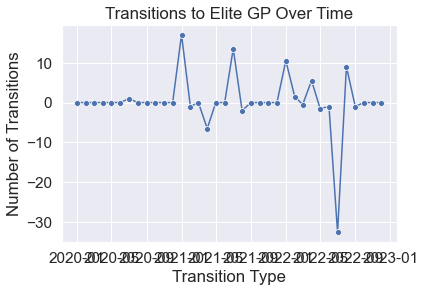

In [327]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'df' is the DataFrame with your data
# df = pd.read_csv('your_file.csv')  # As an example, if your data was in a CSV file

# First, sort the DataFrame by Clinic ID and MonthStartDate to ensure we see the changes chronologically
final_merged.sort_values(by=['ClinID', 'MonthStartDate'], inplace=True)

# Then, we'll group by 'ClinID' and apply a lambda function to detect changes in 'isElite'
transitions = final_merged.groupby('ClinID')['isElite'].apply(lambda x: x.diff())
transitions = transitions.groupby('MonthStartDate').sum()

# Now 'transitions' contains the number of times each clinic changed its 'isElite' status
# We want to plot the sum of transitions from 0 to 1 and 1 to 0
# Since each change is counted as 1, we can simply divide the sum by 2 to get the number of transitions

# # Count transitions for 0 to 1 and 1 to 0
# transitions_from_0_to_1 = transitions[transitions.index % 2 == 1].sum() / 2
# transitions_from_1_to_0 = transitions[transitions.index % 2 == 0].sum() / 2

# Plotting
sns.set(style = 'darkgrid')
sns.set(font_scale=1.4)

fig, ax = plt.subplots()
sns.lineplot(data=transitions, x=transitions.index, y=transitions, marker = 'o')
plt.title('Transitions to Elite GP Over Time')
plt.ylabel('Number of Transitions')
plt.xlabel('Transition Type')
plt.show()


In [328]:
final_merged = final_merged.reset_index()
final_merged.set_index('MonthStartDate', inplace = True, drop = True)

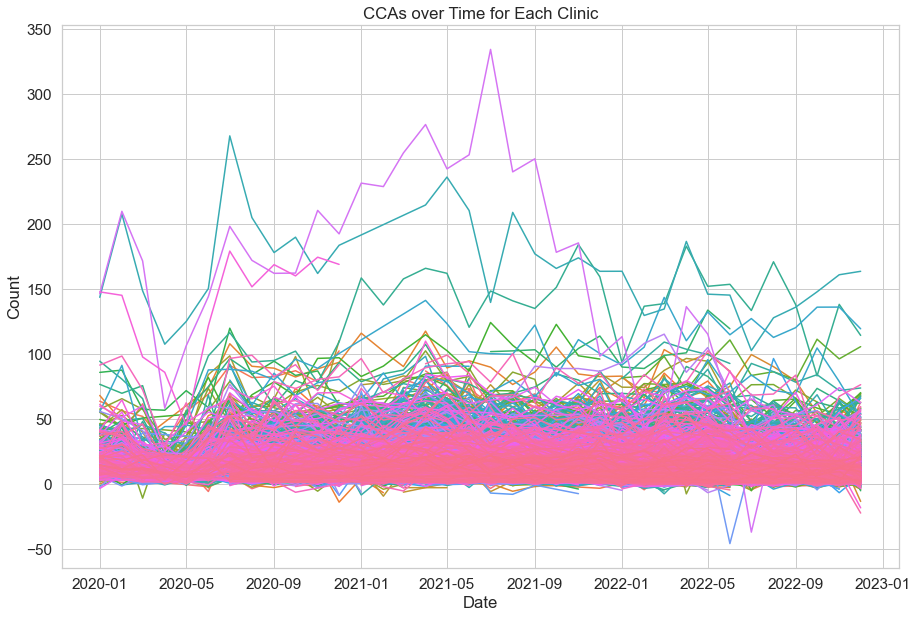

In [329]:
for x in ['CCAs']:
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 10))
    sns.lineplot(data=final_merged, x=final_merged.index, y=x, hue='ClinID', legend=None)
    plt.title(x + ' over Time for Each Clinic')
    plt.xlabel('Date')
    plt.ylabel('Count')

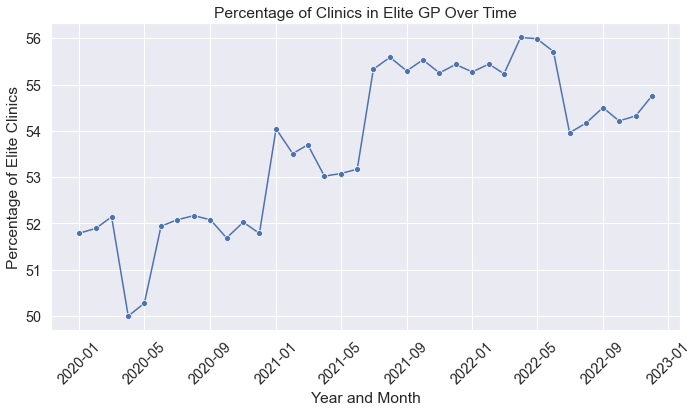

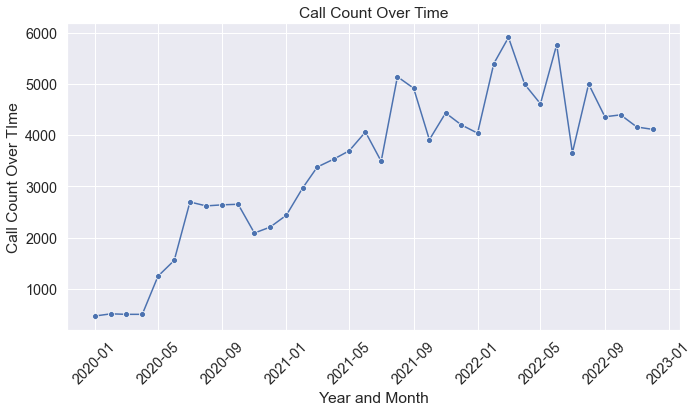

In [330]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid')

final_merged['YearMonth'] = pd.to_datetime(final_merged.index).month

# Now, group by 'YearMonth' and calculate the mean of 'isElite'
metrics = final_merged.groupby('MonthStartDate')[['isElite', 'CallCount']].agg({'isElite' : 'mean', 'CallCount' : 'sum'})

metrics['isElite'] = metrics['isElite'] * 100

sns.set(font_scale=1.3)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=metrics['isElite'], marker = 'o')
plt.title('Percentage of Clinics in Elite GP Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Percentage of Elite Clinics')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=metrics['CallCount'], marker = 'o')
plt.title('Call Count Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Call Count Over TIme')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


In [331]:
final_merged['Month'] = final_merged.index.month

final_merged


ClinID       CCAs  CCAsTeen  CCAsiTero  \
MonthStartDate                                                              
2022-01-01      0052ca6f645bd8afb2d184037   7.494213  0.542535   7.414352   
2022-02-01      0052ca6f645bd8afb2d184037  10.327546  2.834201   9.581019   
2022-03-01      0052ca6f645bd8afb2d184037  13.619213  5.459201  13.539352   
2022-04-01      0052ca6f645bd8afb2d184037   5.438657  0.667535   5.358796   
2022-05-01      0052ca6f645bd8afb2d184037   4.619213  0.223090   5.206019   
...                                   ...        ...       ...        ...   
2022-08-01      fff41e806b27c9674dde79ca1   9.389468  7.337963   8.588542   
2022-09-01      fff41e806b27c9674dde79ca1   5.451968  2.337963   5.401042   
2022-10-01      fff41e806b27c9674dde79ca1  11.250579  6.949074  11.213542   
2022-11-01      fff41e806b27c9674dde79ca1   5.111690  2.393519   5.074653   
2022-12-01      fff41e806b27c9674dde79ca1   2.583912  3.129630   2.880208   

                CCAsComplex  MonthStart  YearStart  YearMonth  isElite  \
MonthStartDate                                                           
2022-01-01         0.602431         1.0     2022.0          1      0.0   
2022-02-01         0.296875         2.0     2022.0          2      0.0   
2022-03-01         0.324653         3.0     2022.0          3      0.0   
2022-04-01         0.324653         4.0     2022.0          4      0.0   
2022-05-01        -0.342014         5.0     2022.0          5      0.0   
...                     ...         ...        ...        ...      ...   
2022-08-01         1.803819         8.0     2022.0          8      1.0   
2022-09-01         0.553819         9.0     2022.0          9      1.0   
2022-10-01         2.293403        10.0     2022.0         10      1.0   
2022-11-01        -0.692708        11.0     2022.0         11      1.0   
2022-12-01         1.293403        12.0     2022.0         12      1.0   

                currMonth  ...  Call - Service Call  Call - Smile Consult  \
MonthStartDate             ...                                              
2022-01-01            1.0  ...                    0                     0   
2022-02-01            2.0  ...                    0                     0   
2022-03-01            3.0  ...                    0                     0   
2022-04-01            4.0  ...                    0                     0   
2022-05-01            5.0  ...                    0                     0   
...                   ...  ...                  ...                   ...   
2022-08-01            8.0  ...                    0                     0   
2022-09-01            9.0  ...                    0                     0   
2022-10-01           10.0  ...                    0                     0   
2022-11-01           11.0  ...                    0                     0   
2022-12-01           12.0  ...                    0                     0   

                Call - Special Initiatives  \
MonthStartDate                               
2022-01-01                               0   
2022-02-01                               0   
2022-03-01                               0   
2022-04-01                               0   
2022-05-01                               0   
...                                    ...   
2022-08-01                               0   
2022-09-01                               0   
2022-10-01                               0   
2022-11-01                               0   
2022-12-01                               0   

                Call - Special Markets Administration  \
MonthStartDate                                          
2022-01-01                                          0   
2022-02-01                                          0   
2022-03-01                                          0   
2022-04-01                                          0   
2022-05-01                                          0   
...                                               ...   
2022-08-01   

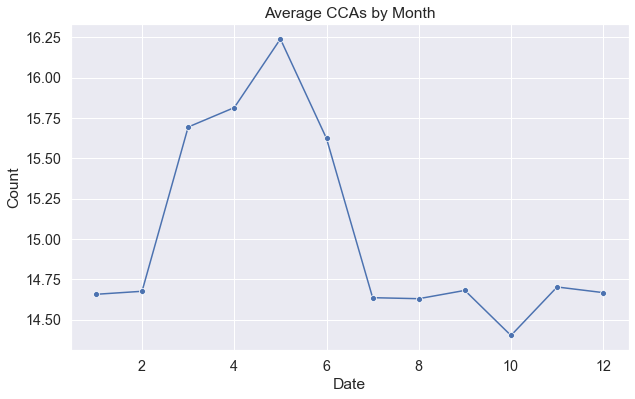

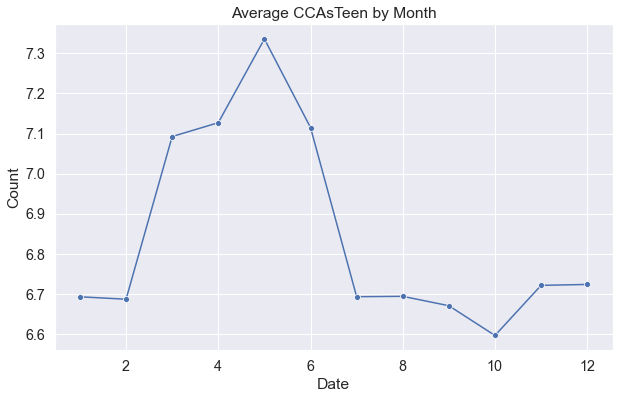

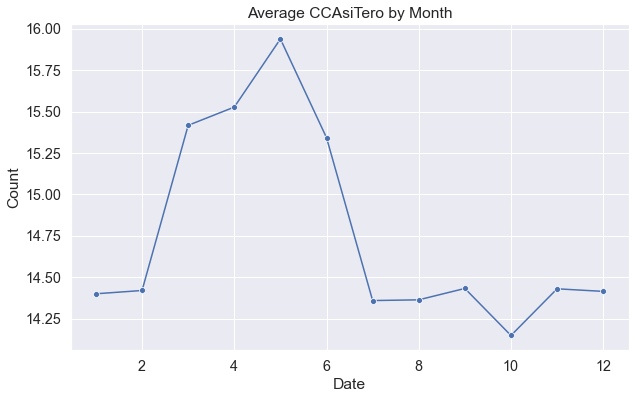

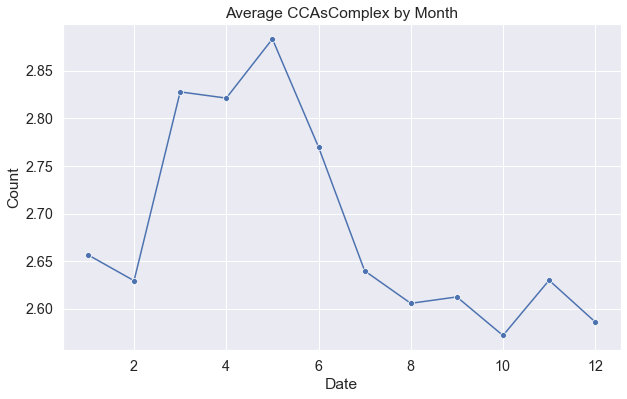

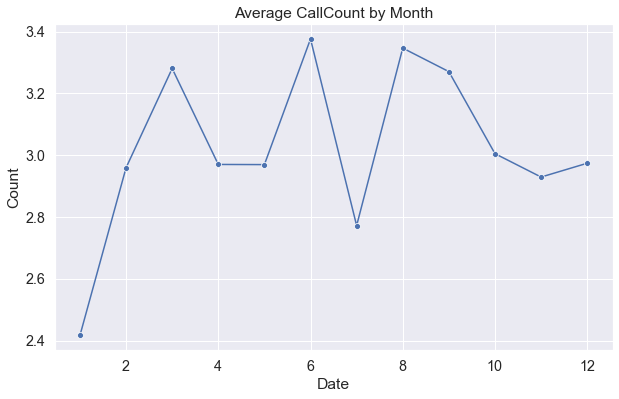

In [332]:
grouped_monthly = final_merged.groupby('Month')[['CCAs', 'CCAsTeen', 'CCAsiTero', 'CCAsComplex', 'CallCount']].mean()

for x in ['CCAs', 'CCAsTeen', 'CCAsiTero', 'CCAsComplex', 'CallCount']:
    sns.set_style("darkgrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=grouped_monthly, x=grouped_monthly.index, y=x, legend=None, marker = 'o')
    plt.title("Average " + x + ' by Month')
    plt.xlabel('Date')
    plt.ylabel('Count')

### Model Building

In [333]:
final_merged_data = final_merged_one_hot.copy()

In [334]:
final_merged_data

CCAs  CCAsTeen  CCAsiTero  \
ClinID                    MonthStartDate                                   
0052ca6f645bd8afb2d184037 2022-01-01       7.494213  0.542535   7.414352   
                          2022-02-01      10.327546  2.834201   9.581019   
                          2022-03-01      13.619213  5.459201  13.539352   
                          2022-04-01       5.438657  0.667535   5.358796   
                          2022-05-01       4.619213  0.223090   5.206019   
...                                             ...       ...        ...   
fff41e806b27c9674dde79ca1 2022-08-01       9.389468  7.337963   8.588542   
                          2022-09-01       5.451968  2.337963   5.401042   
                          2022-10-01      11.250579  6.949074  11.213542   
                          2022-11-01       5.111690  2.393519   5.074653   
                          2022-12-01       2.583912  3.129630   2.880208   

                                          CCAsComplex  MonthStart  YearStart  \
ClinID                    MonthStartDate                                       
0052ca6f645bd8afb2d184037 2022-01-01         0.602431         1.0     2022.0   
                          2022-02-01         0.296875         2.0     2022.0   
                          2022-03-01         0.324653         3.0     2022.0   
                          2022-04-01         0.324653         4.0     2022.0   
                          2022-05-01        -0.342014         5.0     2022.0   
...                                               ...         ...        ...   
fff41e806b27c9674dde79ca1 2022-08-01         1.803819         8.0     2022.0   
                          2022-09-01         0.553819         9.0     2022.0   
                          2022-10-01         2.293403        10.0     2022.0   
                          2022-11-01        -0.692708        11.0     2022.0   
                          2022-12-01         1.293403        12.0     2022.0   

                                         YearMonth  isElite  currMonth  \
ClinID                    MonthStartDate                                 
0052ca6f645bd8afb2d184037 2022-01-01       2022-01      0.0        1.0   
                          2022-02-01       2022-02      0.0        2.0   
                          2022-03-01       2022-03      0.0        3.0   
                          2022-04-01       2022-04      0.0        4.0   
                          2022-05-01       2022-05      0.0        5.0   
...                                            ...      ...        ...   
fff41e806b27c9674dde79ca1 2022-08-01       2022-08      1.0        8.0   
                          2022-09-01       2022-09      1.0        9.0   
                          2022-10-01       2022-10      1.0       10.0   
                          2022-11-01       2022-11      1.0       11.0   
                          2022-12-01       2022-12      1.0       12.0   

                                          currYear  ...  \
ClinID                    MonthStartDate            ...   
0052ca6f645bd8afb2d184037 2022-01-01        2022.0  ...   
                          2022-02-01        2022.0  ...   
                          2022-03-01        2022.0  ...   
                          2022-04-01        2022.0  ...   
                          2022-05-01        2022.0  ...   
...                                            ...  ...   
fff41e806b27c9674dde79ca1 2022-08-01        2022.0  ...   
                          2022-09-01        2022.0  ...   
                          2022-10-01        2022.0  ...   
                          2022-11-01        2022.0  ...   
                          2022-12-01        2022.0  ...   

                                          Call - SAM Transition Call One  \
ClinID                    MonthStartDate                                   
0052ca6f645bd8afb2d184037 2022-01-01                                   0   
                          2022-02-01                      

In [335]:
final_merged_data.reset_index(inplace=True)
final_merged_data.set_index('MonthStartDate', inplace = True)

In [336]:
final_merged_data = final_merged_data.merge(extracted_contacts, how = 'left', on = ['ClinID'])
final_merged_data

ClinID       CCAs  CCAsTeen  CCAsiTero  CCAsComplex  \
0      0052ca6f645bd8afb2d184037   7.494213  0.542535   7.414352     0.602431   
1      0052ca6f645bd8afb2d184037  10.327546  2.834201   9.581019     0.296875   
2      0052ca6f645bd8afb2d184037  13.619213  5.459201  13.539352     0.324653   
3      0052ca6f645bd8afb2d184037   5.438657  0.667535   5.358796     0.324653   
4      0052ca6f645bd8afb2d184037   4.619213  0.223090   5.206019    -0.342014   
...                          ...        ...       ...        ...          ...   
51168  fff41e806b27c9674dde79ca1   9.389468  7.337963   8.588542     1.803819   
51169  fff41e806b27c9674dde79ca1   5.451968  2.337963   5.401042     0.553819   
51170  fff41e806b27c9674dde79ca1  11.250579  6.949074  11.213542     2.293403   
51171  fff41e806b27c9674dde79ca1   5.111690  2.393519   5.074653    -0.692708   
51172  fff41e806b27c9674dde79ca1   2.583912  3.129630   2.880208     1.293403   

       MonthStart  YearStart YearMonth  isElite  currMonth  ...  \
0             1.0     2022.0   2022-01      0.0        1.0  ...   
1             2.0     2022.0   2022-02      0.0        2.0  ...   
2             3.0     2022.0   2022-03      0.0        3.0  ...   
3             4.0     2022.0   2022-04      0.0        4.0  ...   
4             5.0     2022.0   2022-05      0.0        5.0  ...   
...           ...        ...       ...      ...        ...  ...   
51168         8.0     2022.0   2022-08      1.0        8.0  ...   
51169         9.0     2022.0   2022-09      1.0        9.0  ...   
51170        10.0     2022.0   2022-10      1.0       10.0  ...   
51171        11.0     2022.0   2022-11      1.0       11.0  ...   
51172        12.0     2022.0   2022-12      1.0       12.0  ...   

       Call - Service Call  Call - Smile Consult  Call - Special Initiatives  \
0                        0                     0                           0   
1                        0                     0                           0   
2                        0                     0                           0   
3                        0                     0                           0   
4                        0                     0                           0   
...                    ...                   ...                         ...   
51168                    0                     0                           0   
51169                    0                     0                           0   
51170                    0                     0                           0   
51171                    0                     0                           0   
51172                    0                     0                           0   

       Call - Special Markets Administration  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
51168                                      0   
51169                                      0   
51170                                      0   
51171                                      0   
51172                                      0   

       Call - Special Markets Partner Activities  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
51168                                          0   
51169                                          0   
51170                                          0   
51171                                          0   
51172                                          0   

       Call - UPS My Choice Training  Call - Virtual Care  Call - iPro  \
0          

In [337]:
import pandas as pd

columns_to_normalize = ['CCAs', 'CCAsTeen', 'CCAsiTero', 'CCAsComplex']

# Iterate through unique YearMonth and State combinations
for (year_month, state), group in final_merged_data.groupby(['YearMonth', 'State']):
    # Normalize the specified columns for the current YearMonth and State combination
    final_merged_data.loc[group.index, columns_to_normalize] = (
        100 * group[columns_to_normalize] / group[columns_to_normalize].mean() 
    )



In [338]:
final_merged_data

ClinID       CCAs   CCAsTeen  CCAsiTero  \
0      0052ca6f645bd8afb2d184037  59.158370  10.289362  59.831487   
1      0052ca6f645bd8afb2d184037  79.492355  52.844040  75.253254   
2      0052ca6f645bd8afb2d184037  92.825869  89.004868  94.433772   
3      0052ca6f645bd8afb2d184037  38.420131  10.974646  38.766194   
4      0052ca6f645bd8afb2d184037  30.928027   3.447376  35.790080   
...                          ...        ...        ...        ...   
51168  fff41e806b27c9674dde79ca1  62.112141  82.877945  58.060622   
51169  fff41e806b27c9674dde79ca1  38.737721  29.613728  38.645391   
51170  fff41e806b27c9674dde79ca1  84.246791  91.253878  84.403264   
51171  fff41e806b27c9674dde79ca1  40.005629  37.668366  39.547462   
51172  fff41e806b27c9674dde79ca1  18.921619  37.306744  21.148541   

       CCAsComplex  MonthStart  YearStart YearMonth  isElite  currMonth  ...  \
0        28.552051         1.0     2022.0   2022-01      0.0        1.0  ...   
1        13.534247         2.0     2022.0   2022-02      0.0        2.0  ...   
2        13.448565         3.0     2022.0   2022-03      0.0        3.0  ...   
3        13.861972         4.0     2022.0   2022-04      0.0        4.0  ...   
4       -13.577198         5.0     2022.0   2022-05      0.0        5.0  ...   
...            ...         ...        ...       ...      ...        ...  ...   
51168    50.898106         8.0     2022.0   2022-08      1.0        8.0  ...   
51169    17.972795         9.0     2022.0   2022-09      1.0        9.0  ...   
51170    69.186453        10.0     2022.0   2022-10      1.0       10.0  ...   
51171   -23.881320        11.0     2022.0   2022-11      1.0       11.0  ...   
51172    42.346820        12.0     2022.0   2022-12      1.0       12.0  ...   

       Call - Service Call  Call - Smile Consult  Call - Special Initiatives  \
0                        0                     0                           0   
1                        0                     0                           0   
2                        0                     0                           0   
3                        0                     0                           0   
4                        0                     0                           0   
...                    ...                   ...                         ...   
51168                    0                     0                           0   
51169                    0                     0                           0   
51170                    0                     0                           0   
51171                    0                     0                           0   
51172                    0                     0                           0   

       Call - Special Markets Administration  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
51168                                      0   
51169                                      0   
51170                                      0   
51171                                      0   
51172                                      0   

       Call - Special Markets Partner Activities  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
51168                                          0   
51169                                          0   
51170                                          0   
51171                                          0   
51172                                          0   

       Call - UPS My Choice Training  Call - Virtual Care  Call - iPro  \

In [339]:
# Assume final_merged_data is your DataFrame and it's already sorted by MonthStartDate
# If not sorted, use the following line to sort it
# final_merged_data.sort_values(by=['ClinID', 'MonthStartDate'], inplace=True)

# Now, create the lagged CCAs columns

lagged_cols = ['CCAs', 'CCAsTeen', 'CCAsiTero', 'CCAsComplex', 'CallCount']
new_cols = []
for col in lagged_cols:
    for i in range(1, 7):
        st = f'{col}_t-{i}'
        new_cols.append(st)
        final_merged_data[st] = final_merged_data.groupby('ClinID')[col].shift(i)
        
lagged_cols = ['isElite']
for col in lagged_cols:
    for i in range(1, 2):
        st = f'{col}_t-{i}'
        new_cols.append(st)
        final_merged_data[st] = final_merged_data.groupby('ClinID')[col].shift(i)

# Fill missing values with the oldest available 'CCAs' value within each clinic
# final_merged_data[new_cols] = (
#     final_merged_data.groupby('ClinID')[new_cols]
#     .apply(lambda group: group.bfill().ffill())
# )

# Confirm changes

final_merged_data.fillna(0, inplace=True)
final_merged_data[['ClinID'] + new_cols].head()


ClinID   CCAs_t-1   CCAs_t-2   CCAs_t-3  CCAs_t-4  \
0  0052ca6f645bd8afb2d184037   0.000000   0.000000   0.000000   0.00000   
1  0052ca6f645bd8afb2d184037  59.158370   0.000000   0.000000   0.00000   
2  0052ca6f645bd8afb2d184037  79.492355  59.158370   0.000000   0.00000   
3  0052ca6f645bd8afb2d184037  92.825869  79.492355  59.158370   0.00000   
4  0052ca6f645bd8afb2d184037  38.420131  92.825869  79.492355  59.15837   

   CCAs_t-5  CCAs_t-6  CCAsTeen_t-1  CCAsTeen_t-2  CCAsTeen_t-3  ...  \
0       0.0       0.0      0.000000      0.000000      0.000000  ...   
1       0.0       0.0     10.289362      0.000000      0.000000  ...   
2       0.0       0.0     52.844040     10.289362      0.000000  ...   
3       0.0       0.0     89.004868     52.844040     10.289362  ...   
4       0.0       0.0     10.974646     89.004868     52.844040  ...   

   CCAsComplex_t-4  CCAsComplex_t-5  CCAsComplex_t-6  CallCount_t-1  \
0         0.000000              0.0              0.0            0.0   
1         0.000000              0.0              0.0            3.0   
2         0.000000              0.0              0.0            2.0   
3         0.000000              0.0              0.0            2.0   
4        28.552051              0.0              0.0            2.0   

   CallCount_t-2  CallCount_t-3  CallCount_t-4  CallCount_t-5  CallCount_t-6  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            3.0            0.0            0.0            0.0            0.0   
3            2.0            3.0            0.0            0.0            0.0   
4            2.0            2.0            3.0            0.0            0.0   

   isElite_t-1  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 32 columns]

In [340]:
for x in final_merged_data.columns:
    print(final_merged_data[x].dtypes, x)

object ClinID
float64 CCAs
float64 CCAsTeen
float64 CCAsiTero
float64 CCAsComplex
float64 MonthStart
float64 YearStart
period[M] YearMonth
float64 isElite
float64 currMonth
float64 currYear
float64 CallCount
uint8 State - Alabama
uint8 State - Alaska
uint8 State - Alberta
uint8 State - Arizona
uint8 State - Arkansas
uint8 State - British Columbia
uint8 State - California
uint8 State - Colorado
uint8 State - Connecticut
uint8 State - Delaware
uint8 State - District of Columbia
uint8 State - Florida
uint8 State - Georgia
uint8 State - Hawaii
uint8 State - Idaho
uint8 State - Illinois
uint8 State - Indiana
uint8 State - Iowa
uint8 State - Kansas
uint8 State - Kentucky
uint8 State - Louisiana
uint8 State - Maine
uint8 State - Manitoba
uint8 State - Maryland
uint8 State - Massachusetts
uint8 State - Mato Grosso do Sul
uint8 State - Michigan
uint8 State - Minnesota
uint8 State - Mississippi
uint8 State - Missouri
uint8 State - Montana
uint8 State - Nebraska
uint8 State - Nevada
uint8 State -

In [341]:
for x in final_merged_data.columns:
    print(x)

ClinID
CCAs
CCAsTeen
CCAsiTero
CCAsComplex
MonthStart
YearStart
YearMonth
isElite
currMonth
currYear
CallCount
State - Alabama
State - Alaska
State - Alberta
State - Arizona
State - Arkansas
State - British Columbia
State - California
State - Colorado
State - Connecticut
State - Delaware
State - District of Columbia
State - Florida
State - Georgia
State - Hawaii
State - Idaho
State - Illinois
State - Indiana
State - Iowa
State - Kansas
State - Kentucky
State - Louisiana
State - Maine
State - Manitoba
State - Maryland
State - Massachusetts
State - Mato Grosso do Sul
State - Michigan
State - Minnesota
State - Mississippi
State - Missouri
State - Montana
State - Nebraska
State - Nevada
State - New Brunswick
State - New Hampshire
State - New Jersey
State - New Mexico
State - New York
State - Newfoundland and Labrador
State - North Carolina
State - North Dakota
State - Northwest Territories
State - Nova Scotia
State - ON
State - Ohio
State - Oklahoma
State - Oregon
State - Pennsylvania
Stat

In [342]:
try:
    final_merged_data.drop(['State', 'YearMonth'], inplace=True, axis = 1)
except:
    pass
final_merged_data

ClinID       CCAs   CCAsTeen  CCAsiTero  \
0      0052ca6f645bd8afb2d184037  59.158370  10.289362  59.831487   
1      0052ca6f645bd8afb2d184037  79.492355  52.844040  75.253254   
2      0052ca6f645bd8afb2d184037  92.825869  89.004868  94.433772   
3      0052ca6f645bd8afb2d184037  38.420131  10.974646  38.766194   
4      0052ca6f645bd8afb2d184037  30.928027   3.447376  35.790080   
...                          ...        ...        ...        ...   
51168  fff41e806b27c9674dde79ca1  62.112141  82.877945  58.060622   
51169  fff41e806b27c9674dde79ca1  38.737721  29.613728  38.645391   
51170  fff41e806b27c9674dde79ca1  84.246791  91.253878  84.403264   
51171  fff41e806b27c9674dde79ca1  40.005629  37.668366  39.547462   
51172  fff41e806b27c9674dde79ca1  18.921619  37.306744  21.148541   

       CCAsComplex  MonthStart  YearStart  isElite  currMonth  currYear  ...  \
0        28.552051         1.0     2022.0      0.0        1.0    2022.0  ...   
1        13.534247         2.0     2022.0      0.0        2.0    2022.0  ...   
2        13.448565         3.0     2022.0      0.0        3.0    2022.0  ...   
3        13.861972         4.0     2022.0      0.0        4.0    2022.0  ...   
4       -13.577198         5.0     2022.0      0.0        5.0    2022.0  ...   
...            ...         ...        ...      ...        ...       ...  ...   
51168    50.898106         8.0     2022.0      1.0        8.0    2022.0  ...   
51169    17.972795         9.0     2022.0      1.0        9.0    2022.0  ...   
51170    69.186453        10.0     2022.0      1.0       10.0    2022.0  ...   
51171   -23.881320        11.0     2022.0      1.0       11.0    2022.0  ...   
51172    42.346820        12.0     2022.0      1.0       12.0    2022.0  ...   

       CCAsComplex_t-4  CCAsComplex_t-5  CCAsComplex_t-6  CallCount_t-1  \
0             0.000000         0.000000         0.000000            0.0   
1             0.000000         0.000000         0.000000            3.0   
2             0.000000         0.000000         0.000000            2.0   
3             0.000000         0.000000         0.000000            2.0   
4            28.552051         0.000000         0.000000            2.0   
...                ...              ...              ...            ...   
51168        67.611687        64.323615        12.849456            0.0   
51169        87.387910        67.611687        64.323615            1.0   
51170        72.012772        87.387910        67.611687            0.0   
51171        23.117000        72.012772        87.387910            2.0   
51172        50.898106        23.117000        72.012772            2.0   

       CallCount_t-2  CallCount_t-3  CallCount_t-4  CallCount_t-5  \
0                0.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                3.0            0.0            0.0            0.0   
3                2.0            3.0            0.0            0.0   
4                2.0            2.0            3.0            0.0   
...              ...            ...            ...            ...   
51168            3.0            3.0            3.0            3.0   
51169            0.0            3.0            3.0            3.0   
51170            1.0            0.0            3.0            3.0   
51171            0.0            1.0            0.0            3.0   
51172            2.0            0.0            1.0            0.0   

       CallCount_t-6  isElite_t-1  
0                0.0          0.0  
1                0.0          0.0  
2                0.0          0.0  
3                0.0          0.0  
4                0.0          0.0  
...              ...          ...  
51168            5.0          1.0  
51169            3.0          1.0  
51170            3.0          1.0  
51171            3.0          1.0  
51172            3.0          1.0  

[51173 rows x 145 columns]

In [343]:
for x in final_merged_data.columns:
    print(final_merged_data[x].dtypes, x)

object ClinID
float64 CCAs
float64 CCAsTeen
float64 CCAsiTero
float64 CCAsComplex
float64 MonthStart
float64 YearStart
float64 isElite
float64 currMonth
float64 currYear
float64 CallCount
uint8 State - Alabama
uint8 State - Alaska
uint8 State - Alberta
uint8 State - Arizona
uint8 State - Arkansas
uint8 State - British Columbia
uint8 State - California
uint8 State - Colorado
uint8 State - Connecticut
uint8 State - Delaware
uint8 State - District of Columbia
uint8 State - Florida
uint8 State - Georgia
uint8 State - Hawaii
uint8 State - Idaho
uint8 State - Illinois
uint8 State - Indiana
uint8 State - Iowa
uint8 State - Kansas
uint8 State - Kentucky
uint8 State - Louisiana
uint8 State - Maine
uint8 State - Manitoba
uint8 State - Maryland
uint8 State - Massachusetts
uint8 State - Mato Grosso do Sul
uint8 State - Michigan
uint8 State - Minnesota
uint8 State - Mississippi
uint8 State - Missouri
uint8 State - Montana
uint8 State - Nebraska
uint8 State - Nevada
uint8 State - New Brunswick
uint8

# Model Training & Eval

In [344]:
final_merged_data

ClinID       CCAs   CCAsTeen  CCAsiTero  \
0      0052ca6f645bd8afb2d184037  59.158370  10.289362  59.831487   
1      0052ca6f645bd8afb2d184037  79.492355  52.844040  75.253254   
2      0052ca6f645bd8afb2d184037  92.825869  89.004868  94.433772   
3      0052ca6f645bd8afb2d184037  38.420131  10.974646  38.766194   
4      0052ca6f645bd8afb2d184037  30.928027   3.447376  35.790080   
...                          ...        ...        ...        ...   
51168  fff41e806b27c9674dde79ca1  62.112141  82.877945  58.060622   
51169  fff41e806b27c9674dde79ca1  38.737721  29.613728  38.645391   
51170  fff41e806b27c9674dde79ca1  84.246791  91.253878  84.403264   
51171  fff41e806b27c9674dde79ca1  40.005629  37.668366  39.547462   
51172  fff41e806b27c9674dde79ca1  18.921619  37.306744  21.148541   

       CCAsComplex  MonthStart  YearStart  isElite  currMonth  currYear  ...  \
0        28.552051         1.0     2022.0      0.0        1.0    2022.0  ...   
1        13.534247         2.0     2022.0      0.0        2.0    2022.0  ...   
2        13.448565         3.0     2022.0      0.0        3.0    2022.0  ...   
3        13.861972         4.0     2022.0      0.0        4.0    2022.0  ...   
4       -13.577198         5.0     2022.0      0.0        5.0    2022.0  ...   
...            ...         ...        ...      ...        ...       ...  ...   
51168    50.898106         8.0     2022.0      1.0        8.0    2022.0  ...   
51169    17.972795         9.0     2022.0      1.0        9.0    2022.0  ...   
51170    69.186453        10.0     2022.0      1.0       10.0    2022.0  ...   
51171   -23.881320        11.0     2022.0      1.0       11.0    2022.0  ...   
51172    42.346820        12.0     2022.0      1.0       12.0    2022.0  ...   

       CCAsComplex_t-4  CCAsComplex_t-5  CCAsComplex_t-6  CallCount_t-1  \
0             0.000000         0.000000         0.000000            0.0   
1             0.000000         0.000000         0.000000            3.0   
2             0.000000         0.000000         0.000000            2.0   
3             0.000000         0.000000         0.000000            2.0   
4            28.552051         0.000000         0.000000            2.0   
...                ...              ...              ...            ...   
51168        67.611687        64.323615        12.849456            0.0   
51169        87.387910        67.611687        64.323615            1.0   
51170        72.012772        87.387910        67.611687            0.0   
51171        23.117000        72.012772        87.387910            2.0   
51172        50.898106        23.117000        72.012772            2.0   

       CallCount_t-2  CallCount_t-3  CallCount_t-4  CallCount_t-5  \
0                0.0            0.0            0.0            0.0   
1                0.0            0.0            0.0            0.0   
2                3.0            0.0            0.0            0.0   
3                2.0            3.0            0.0            0.0   
4                2.0            2.0            3.0            0.0   
...              ...            ...            ...            ...   
51168            3.0            3.0            3.0            3.0   
51169            0.0            3.0            3.0            3.0   
51170            1.0            0.0            3.0            3.0   
51171            0.0            1.0            0.0            3.0   
51172            2.0            0.0            1.0            0.0   

       CallCount_t-6  isElite_t-1  
0                0.0          0.0  
1                0.0          0.0  
2                0.0          0.0  
3                0.0          0.0  
4                0.0          0.0  
...              ...          ...  
51168            5.0          1.0  
51169            3.0          1.0  
51170            3.0          1.0  
51171            3.0          1.0  
51172            3.0          1.0  

[51173 rows x 145 columns]

In [356]:
final_merged_data.to_csv('final_merged_data_seasonality_adj.csv')

In [346]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

fit_df = final_merged_data

try:
    # Convert categorical data (Month and Year) to numerical if needed, or drop if not useful
    fit_df = final_merged_data.drop(['ClinID'], axis=1)
except:
    pass

fit_df.fillna(0, inplace = True)

# Split the data into features and target variable
X = fit_df.drop(['CCAs', 'CCAsTeen', 'CCAsiTero','CCAsComplex'], axis=1)
y = fit_df['CCAs']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predict on test data
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)


In [347]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51173 entries, 0 to 51172
Columns: 140 entries, MonthStart to isElite_t-1
dtypes: float64(37), uint8(103)
memory usage: 21.9 MB


In [348]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
# Calculate Mean Absolute Error for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate R2 Score (Regression Accuracy) for Linear Regression
r2_score_linear = r2_score(y_test, y_pred_linear)
# Calculate R2 Score (Regression Accuracy) for Random Forest
r2_score_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("Linear Regression MAE:", mae_linear)
print("Random Forest MAE:", mae_rf)
print("Linear Regression R2 Score:", r2_score_linear)
print("Random Forest R2 Score:", r2_score_rf)


Linear Regression MAE: 29.20736286777895
Random Forest MAE: 28.06318565983259
Linear Regression R2 Score: 0.7679401424626514
Random Forest R2 Score: 0.7790709313155876


In [367]:
# MDI Feature Importances from RandomForestRegressor
mdi_feature_importances = pd.DataFrame(
    random_forest_model.feature_importances_,
    index=X.columns,
    columns=['MDI Importance']
).sort_values('MDI Importance', ascending=False)

# Permutation Importance
perm_importance = permutation_importance(random_forest_model, X_test, y_test, n_repeats=10, random_state=42)
perm_feature_importances = pd.DataFrame(
    perm_importance.importances_mean,
    index=X.columns,
    columns=['Permutation Importance']
).sort_values('Permutation Importance', ascending=False)




In [368]:
# Linear Regression Coefficients
linear_coef = pd.DataFrame(
    linear_model.coef_,
    index=X.columns,
    columns=['Linear Coefficients']
).sort_values('Linear Coefficients', ascending=False)

In [369]:
try:
    mdi_feature_importances.drop(['t-1', 't-2', 't-3', 't-4', 't-5', 't-6',], inplace=True)
except:
    pass

try:
    perm_feature_importances.drop(['t-1', 't-2', 't-3', 't-4', 't-5', 't-6',], inplace=True)
except:
    pass
    

In [370]:
imps = [linear_coef, mdi_feature_importances, perm_feature_importances]
words = ['State', 'CCA']

for imp in imps:
    for col in imp.index:
        for w in words:
            print(w, col)
            if w in col:
                
                imp.drop(col, inplace=True)

State Call - iPro
CCA Call - iPro
State Call - Products/Digital Tools
CCA Call - Products/Digital Tools
State Call - ClinEd Recruitment
CCA Call - ClinEd Recruitment
State State - New Brunswick
CCA State - New Brunswick
State State - Prince Edward Island
CCA State - Prince Edward Island
State Call - Introduction Call
CCA Call - Introduction Call
State isElite
CCA isElite
State Call - Review Promotions
CCA Call - Review Promotions
State State - Wyoming
CCA State - Wyoming
State State - Northwest Territories
CCA State - Northwest Territories
State Call - Proactive iTero conversation
CCA Call - Proactive iTero conversation
State Call - Digital Workflow
CCA Call - Digital Workflow
State Call - Doctor Growth Program
CCA Call - Doctor Growth Program
State Call - Promotions
CCA Call - Promotions
State State - Quebec
CCA State - Quebec
State Call - Integration Pathway
CCA Call - Integration Pathway
State Call - Special Markets Administration
CCA Call - Special Markets Administration
State Stat

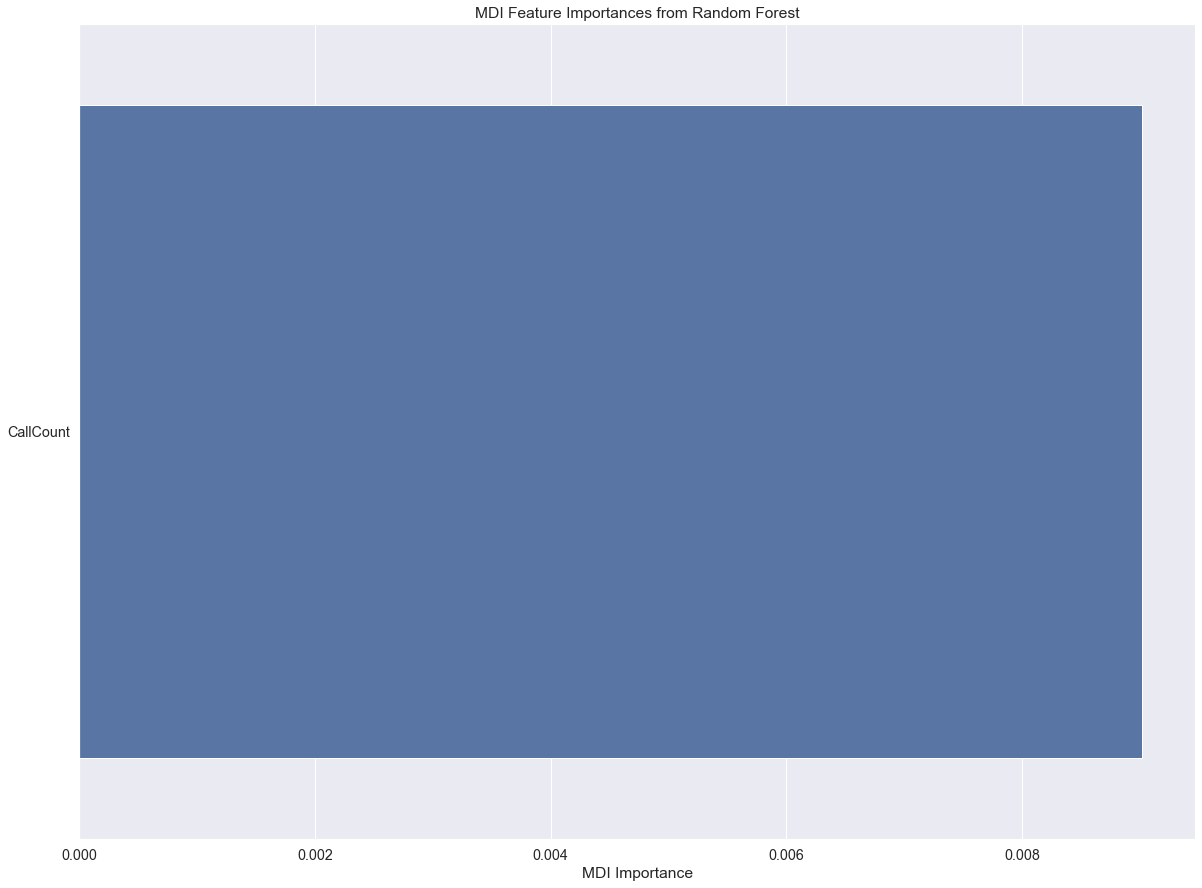

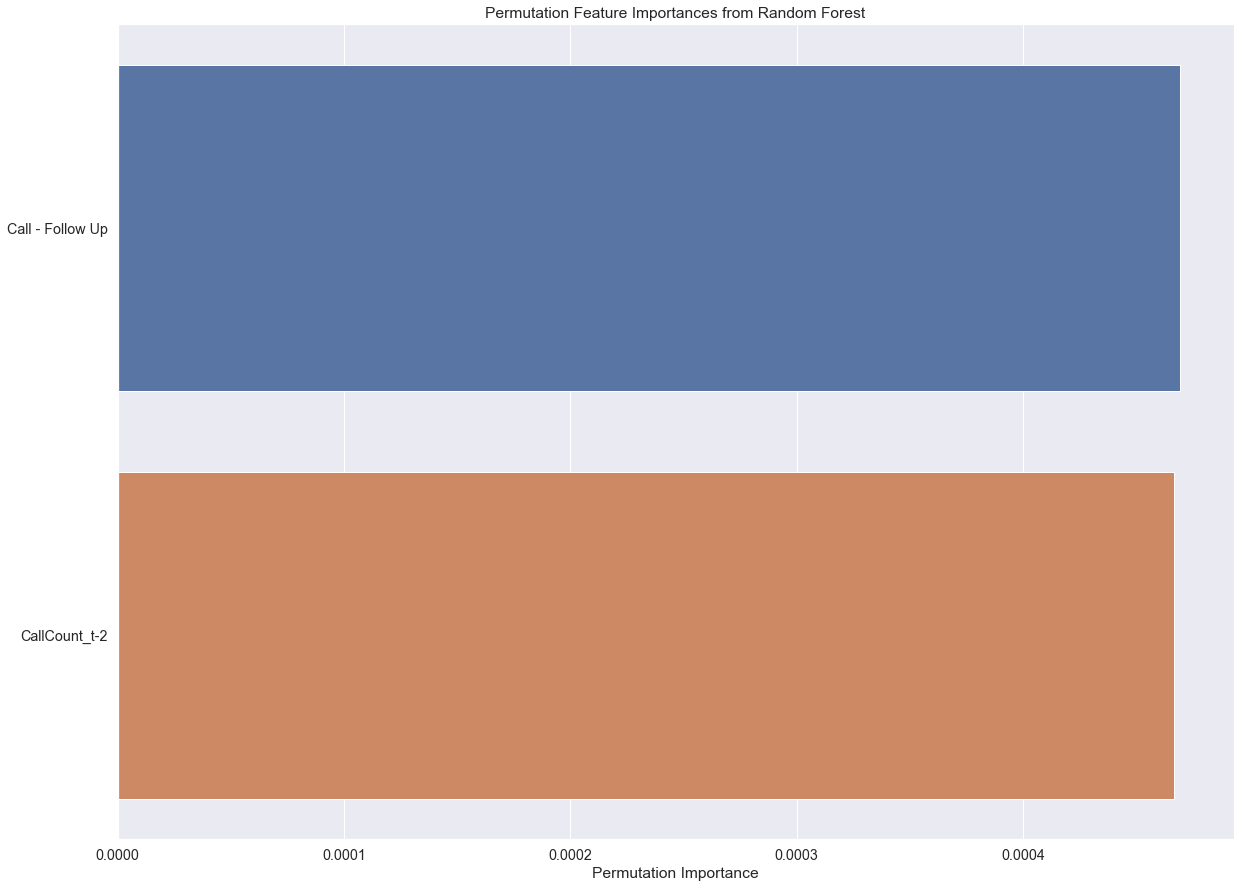

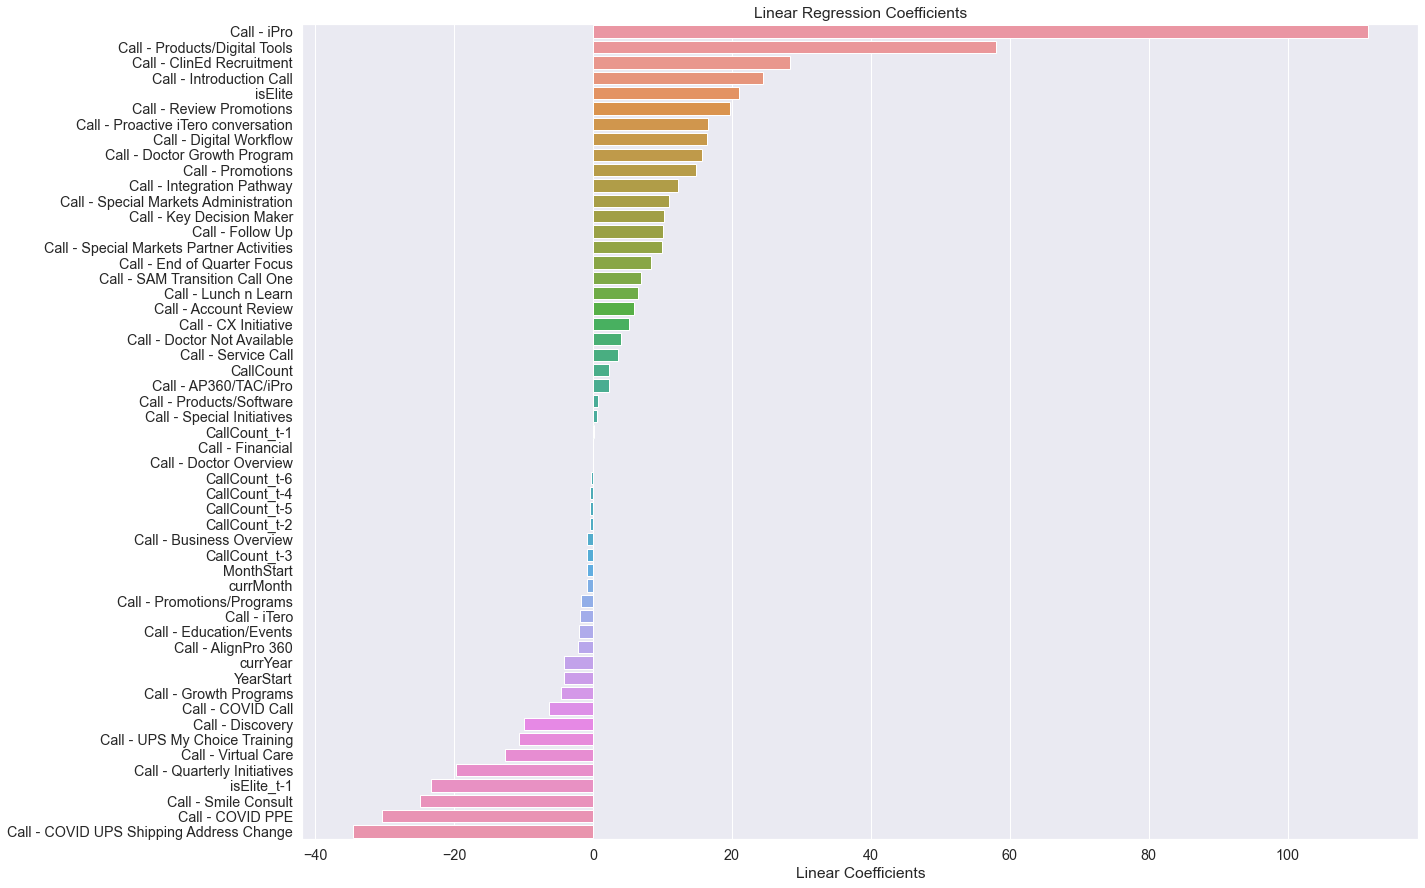

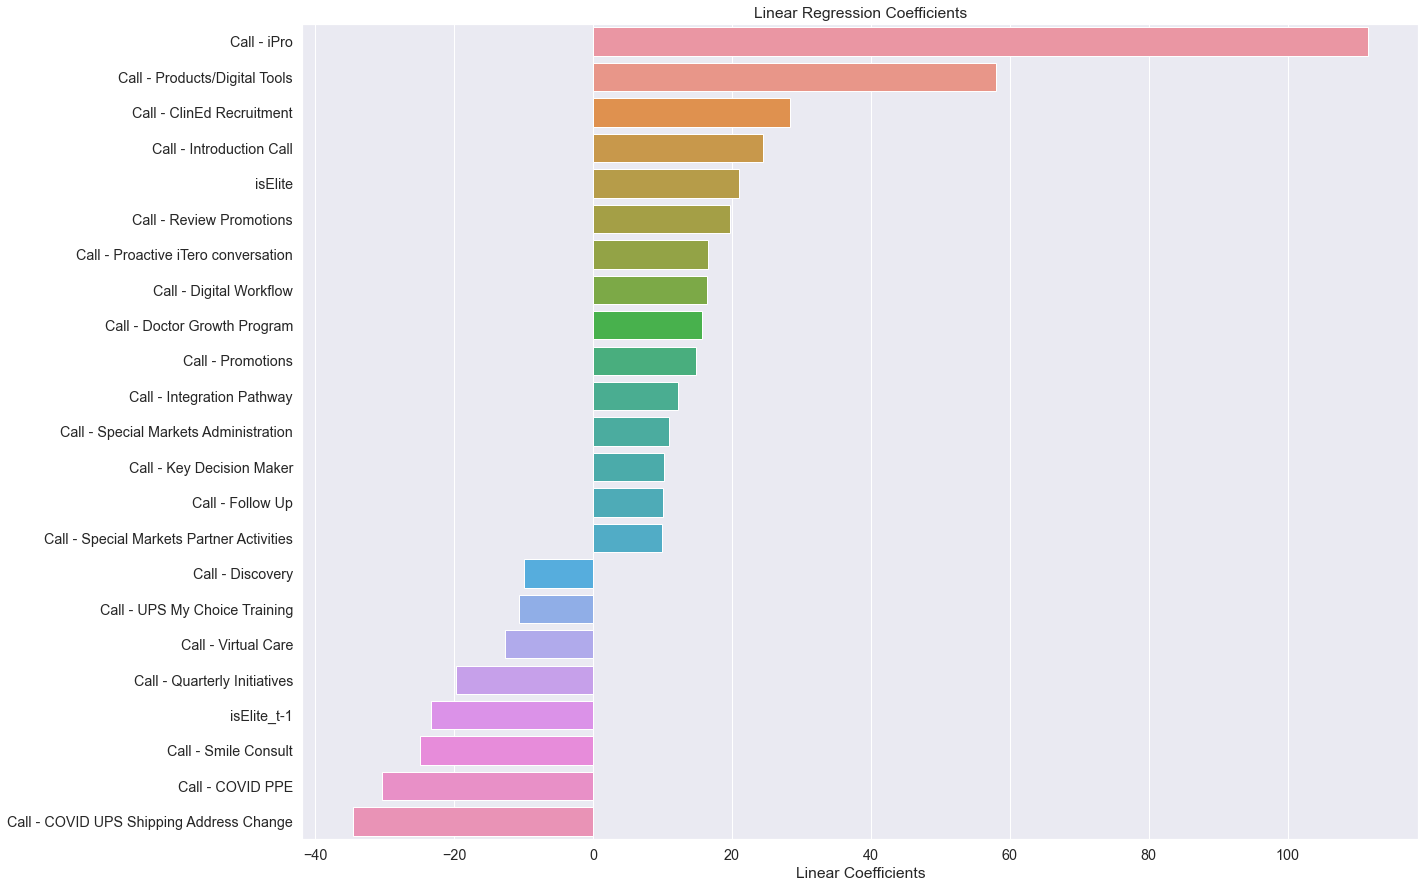

In [366]:

# Plotting MDI Feature Importances

cutCoefs = linear_coef[abs(linear_coef['Linear Coefficients']) >= 9 ]

plt.figure(figsize=(20, 15))
sns.barplot(x='MDI Importance', y=mdi_feature_importances.index, data=mdi_feature_importances, )
plt.title('MDI Feature Importances from Random Forest')
plt.show()

# Plotting Permutation Feature Importances
plt.figure(figsize=(20, 15))
sns.barplot(x='Permutation Importance', y=perm_feature_importances.index, data=perm_feature_importances)
plt.title('Permutation Feature Importances from Random Forest')
plt.show()

# Plotting Linear Regression Coefficients
plt.figure(figsize=(20, 15))
sns.barplot(x='Linear Coefficients', y=linear_coef.index, data=linear_coef)
plt.title('Linear Regression Coefficients')
plt.show()

# Plotting Linear Regression Coefficients
plt.figure(figsize=(20, 15))
sns.barplot(x='Linear Coefficients', y=cutCoefs.index, data=cutCoefs)
plt.title('Linear Regression Coefficients')
# plt.yticks(rotation = -30)
sns.set(font_scale=1.3)
plt.show()



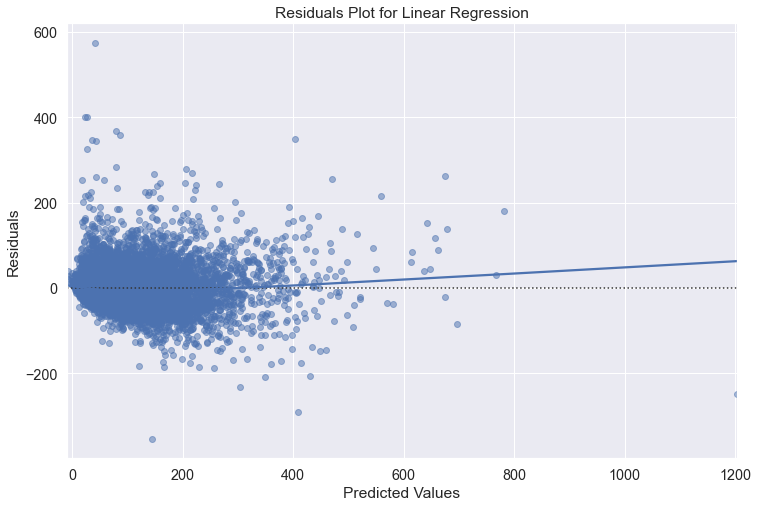

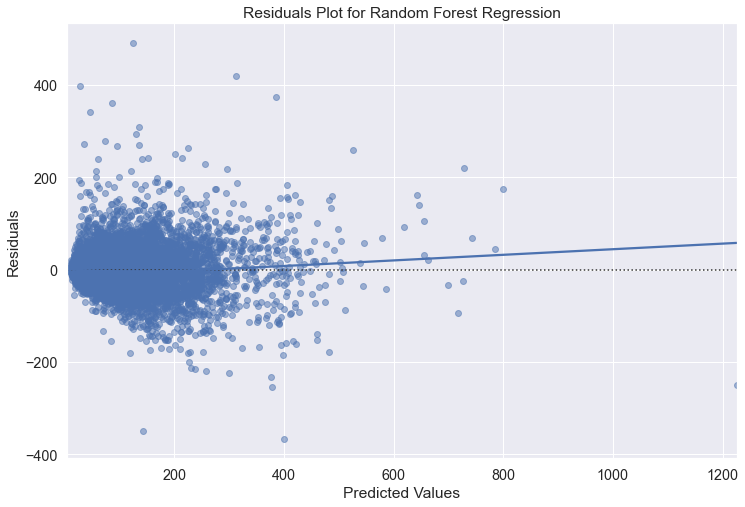

In [357]:
feature_importances = random_forest_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=True)


# Evaluate predictions with residual plots for Linear Regression
plt.figure(figsize=(12, 8))  # Increase figure size
residuals_linear = y_test - y_pred_linear
sns.residplot(x=y_pred_linear, y=residuals_linear, lowess=True, scatter_kws={'alpha':0.5})
plt.title('Residuals Plot for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Evaluate predictions with residual plots for Random Forest Regression
plt.figure(figsize=(12, 8))  # Increase figure size
residuals_rf = y_test - y_pred_rf
sns.residplot(x=y_pred_rf, y=residuals_rf, lowess=True, scatter_kws={'alpha':0.5})
plt.title('Residuals Plot for Random Forest Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()